In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from utils import PkdbModel
from analysis import PlotCategory, create_plots

In [9]:
# filter out outliers probably from same clinical study 

In [10]:
def all_idx(data):
    return pd.Series(True, index=data.index)

def healthy_idx(data):
    return data[('healthy', 'choice')] == 'Y'
          
def rest_idx(data):
    return (~healthy_idx(data))

In [11]:
colors = sns.color_palette("colorblind",n_colors=5)

categories_all = [           
            PlotCategory(name="Healthy", color=colors[0], marker='o', data_idx=healthy_idx),
            PlotCategory(name="Unhealthy", color="darkgray", marker='o', data_idx=rest_idx),

             ]

* midazolam_clearance *
Healthy    I: 80  G: 33 TI: 416
Unhealthy  I: 0   G: 3  TI: 21 
Healthy    I: 73  G: 26 TI: 316
Unhealthy  I: 0   G: 3  TI: 21 
Healthy    I: 87  G: 31 TI: 388
Unhealthy  I: 0   G: 3  TI: 21 
Healthy    I: 73  G: 25 TI: 310
Unhealthy  I: 0   G: 3  TI: 21 
* midazolam_thalf *
Healthy    I: 106 G: 36 TI: 447
Unhealthy  I: 0   G: 3  TI: 21 
Healthy    I: 85  G: 21 TI: 279
Unhealthy  I: 0   G: 3  TI: 21 
Healthy    I: 85  G: 18 TI: 261
Unhealthy  I: 0   G: 3  TI: 21 
Healthy    I: 85  G: 18 TI: 261
Unhealthy  I: 0   G: 3  TI: 21 
* midazolam_tmax *
Healthy    I: 64  G: 22 TI: 264
Unhealthy  I: 0   G: 2  TI: 14 
Healthy    I: 50  G: 14 TI: 179
Unhealthy  I: 0   G: 2  TI: 14 
Healthy    I: 50  G: 13 TI: 173
Unhealthy  I: 0   G: 2  TI: 14 
Healthy    I: 50  G: 13 TI: 173
Unhealthy  I: 0   G: 2  TI: 14 
* midazolam_vd *
Healthy    I: 64  G: 22 TI: 286
Unhealthy  I: 0   G: 2  TI: 14 
Healthy    I: 57  G: 16 TI: 208
Unhealthy  I: 0   G: 2  TI: 14 
Healthy    I: 57  G: 16 

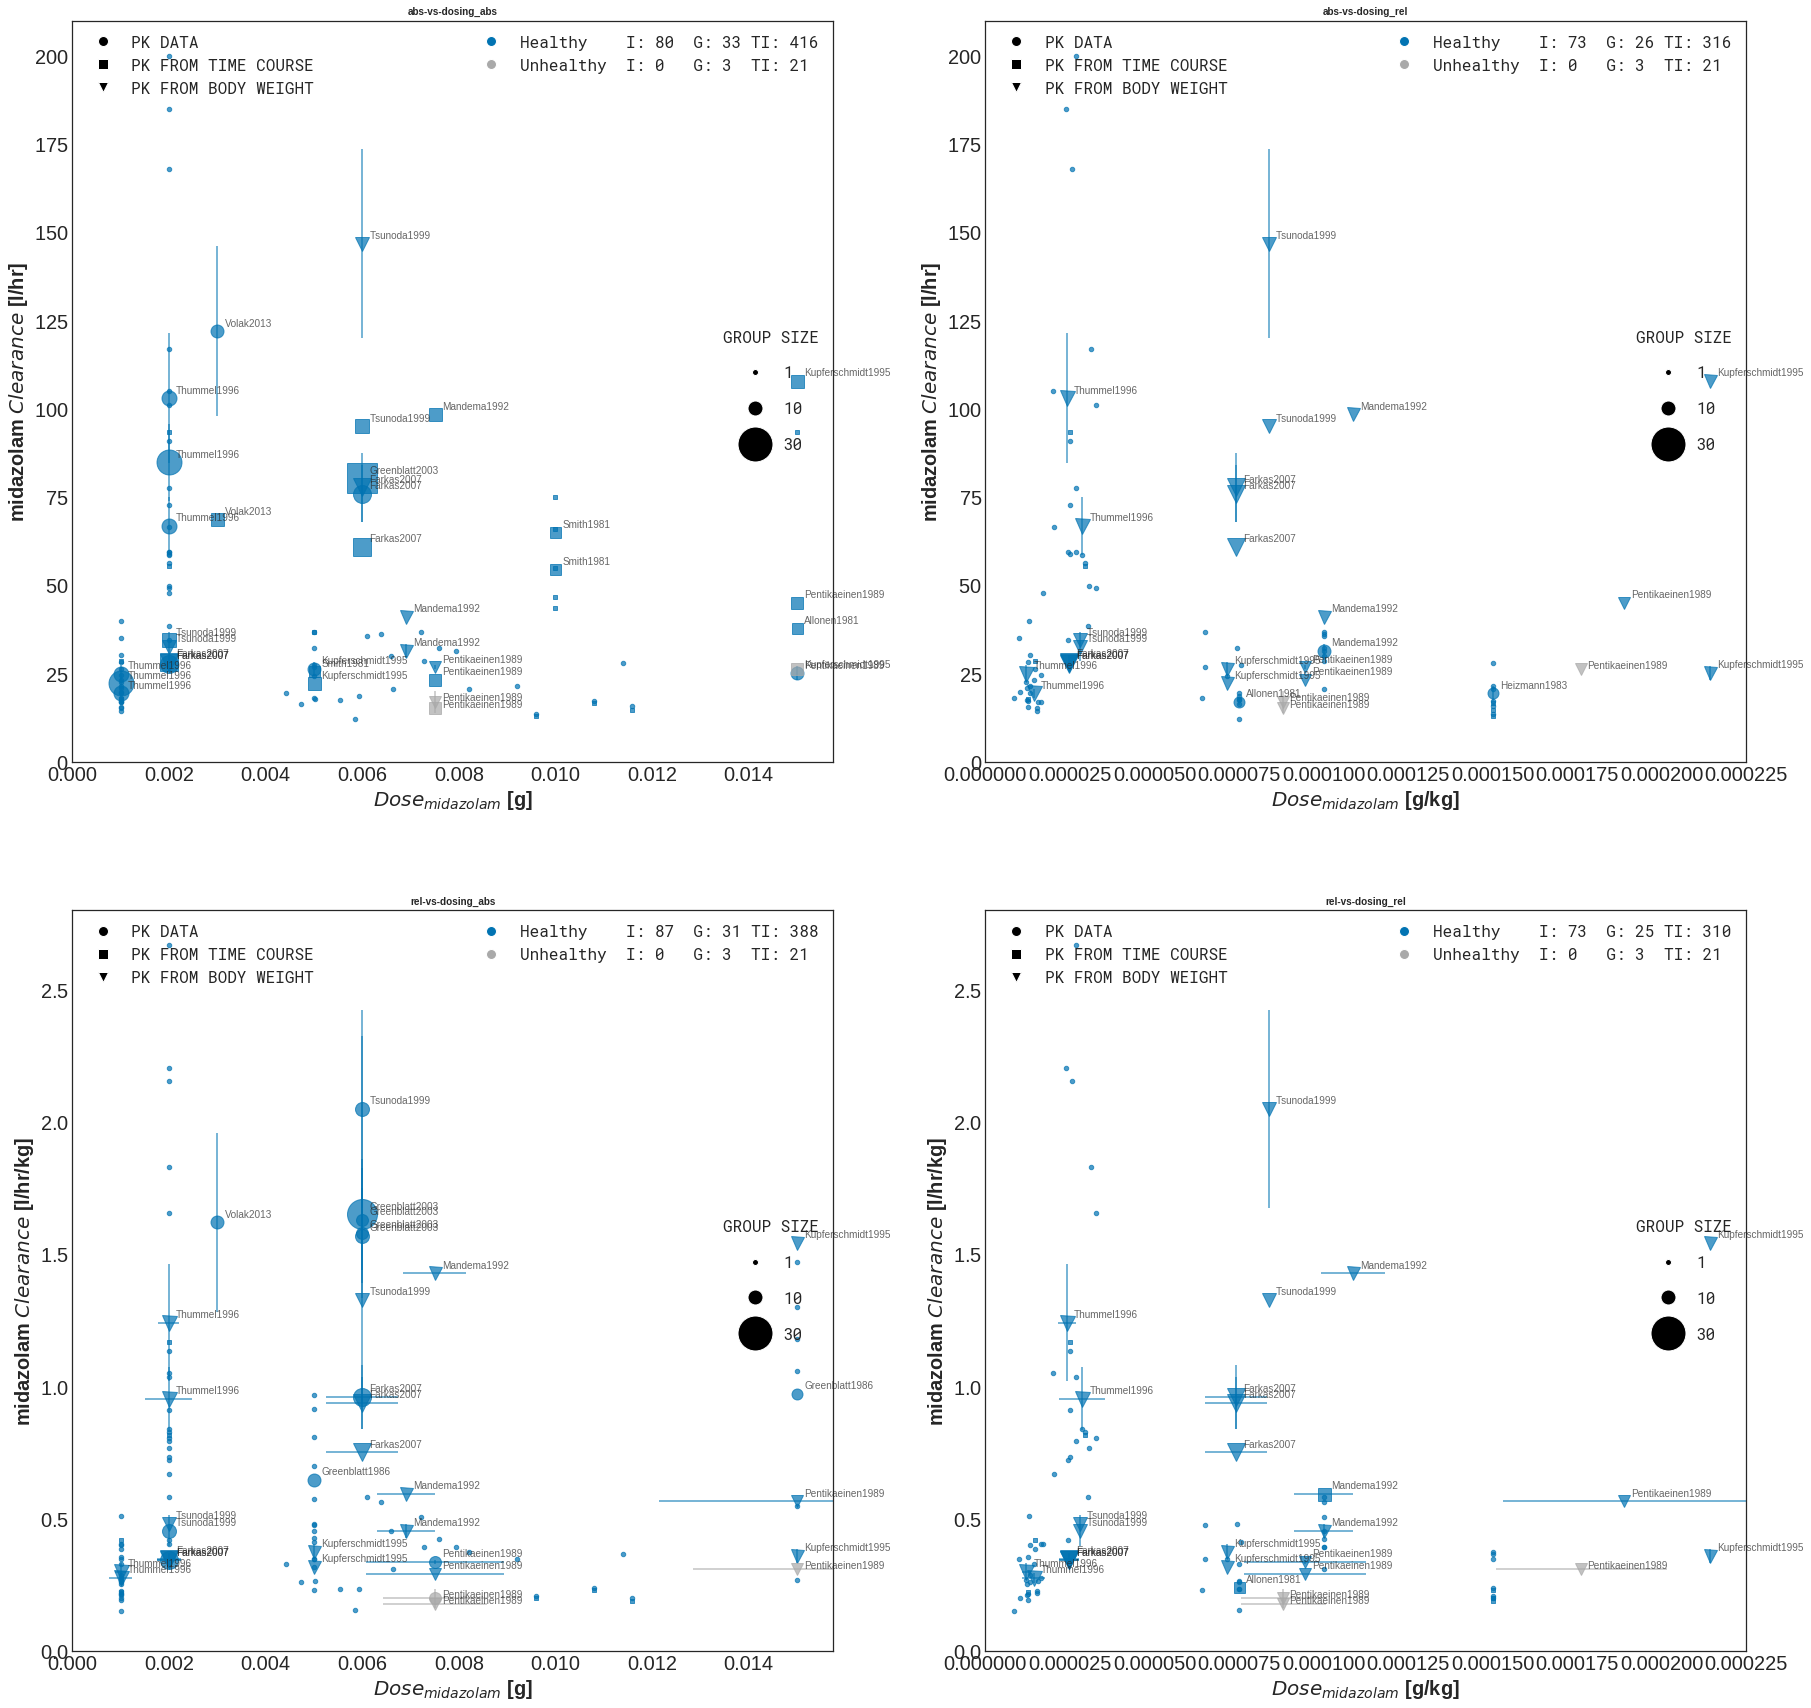

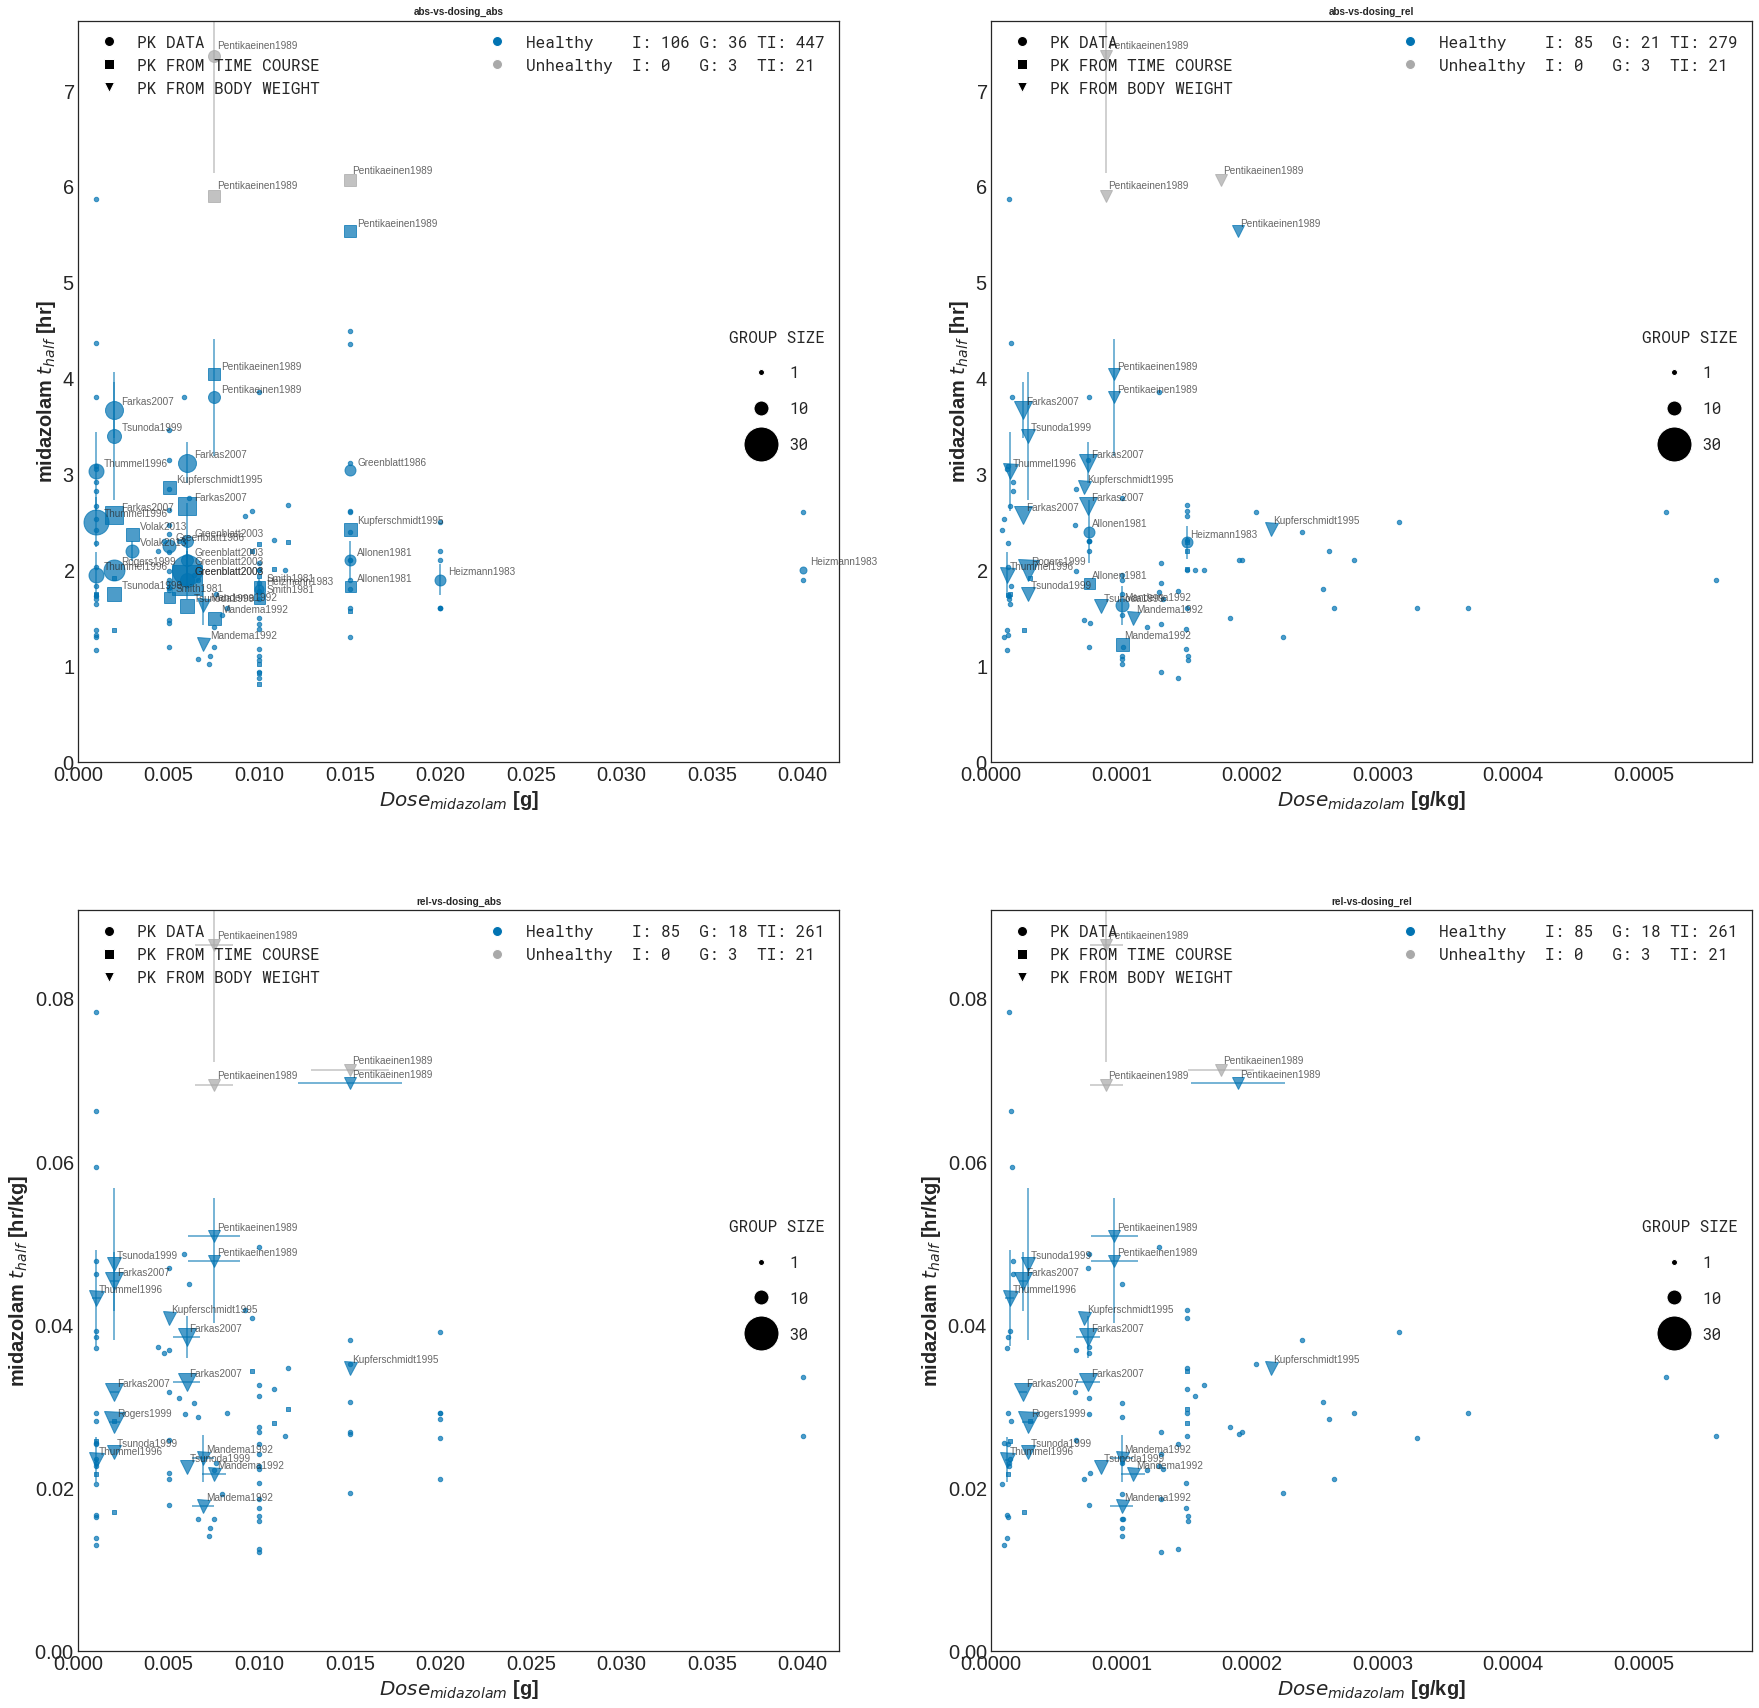

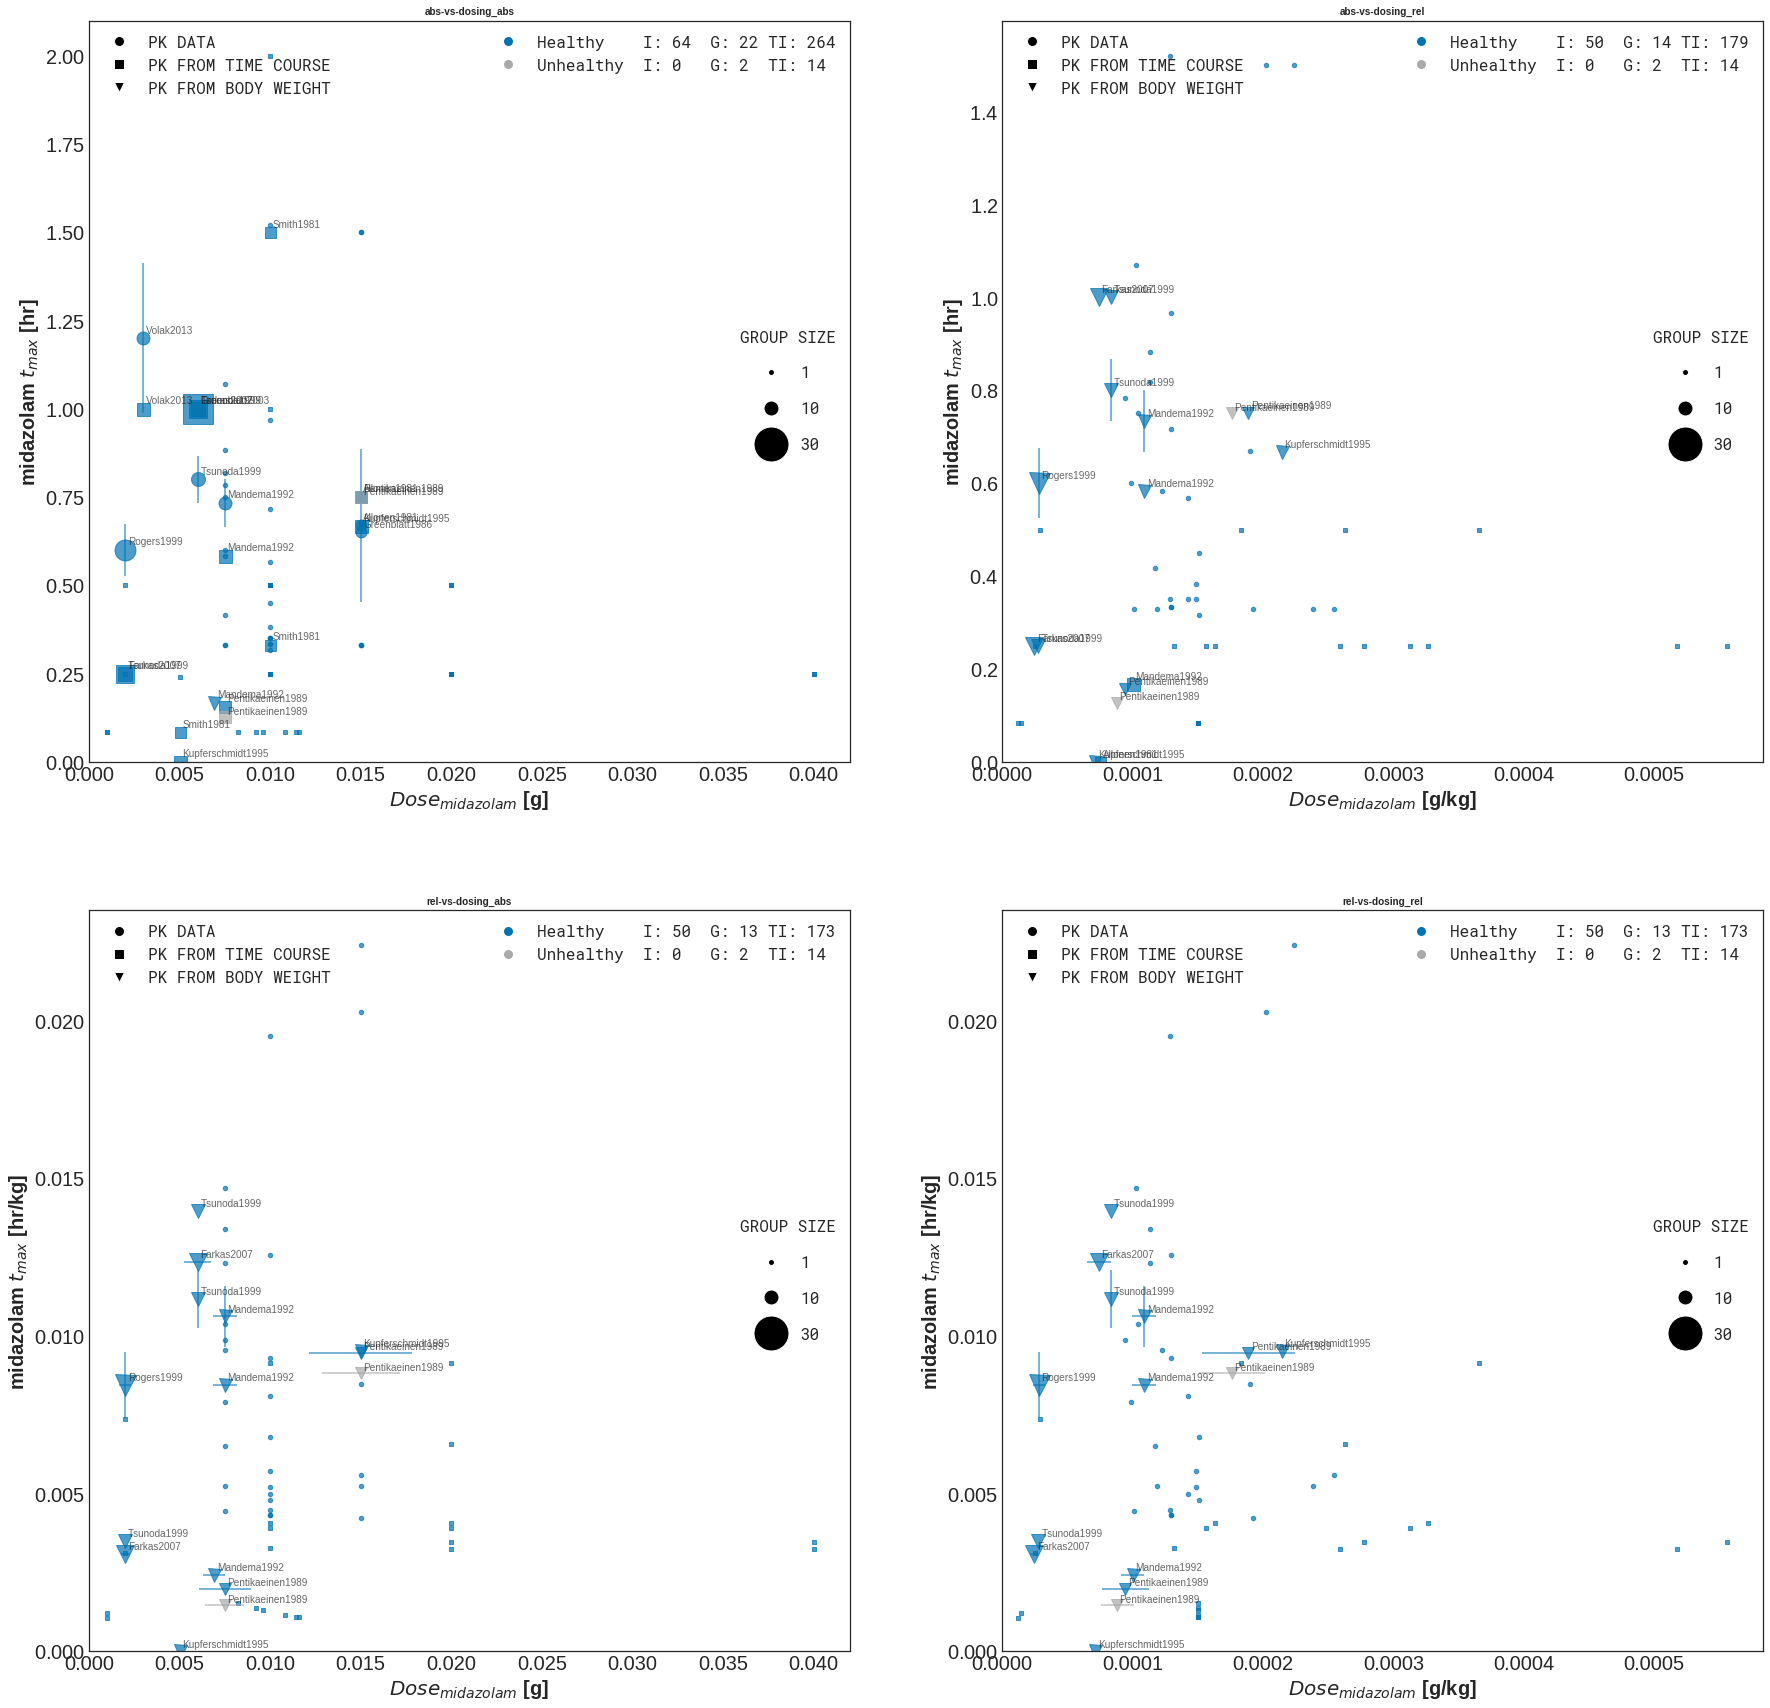

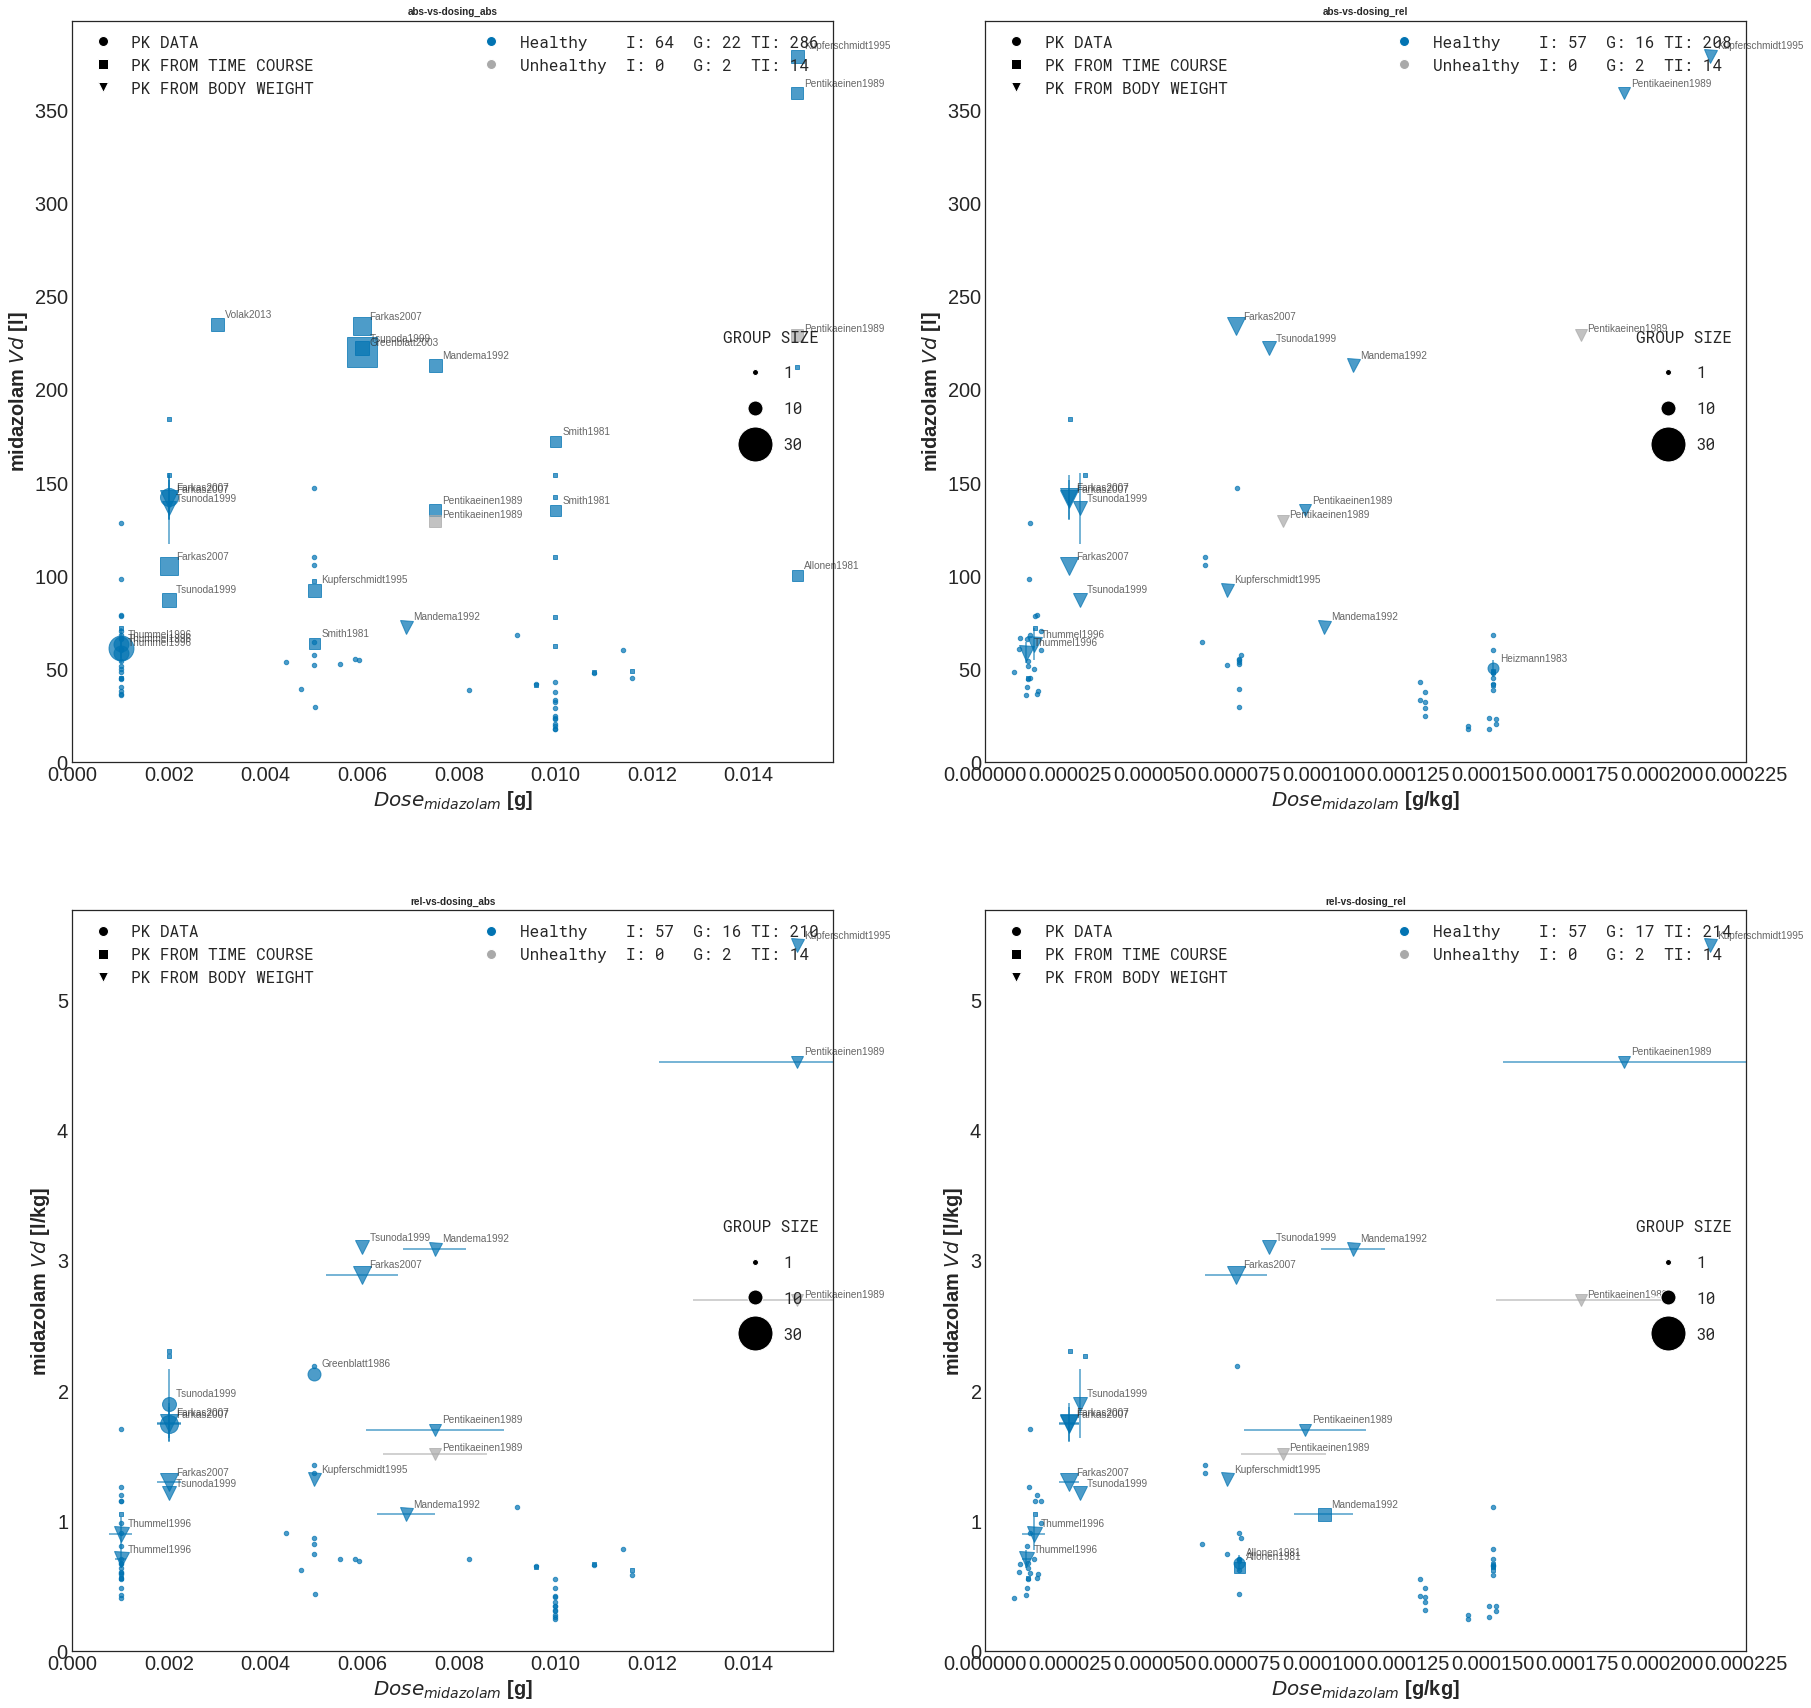

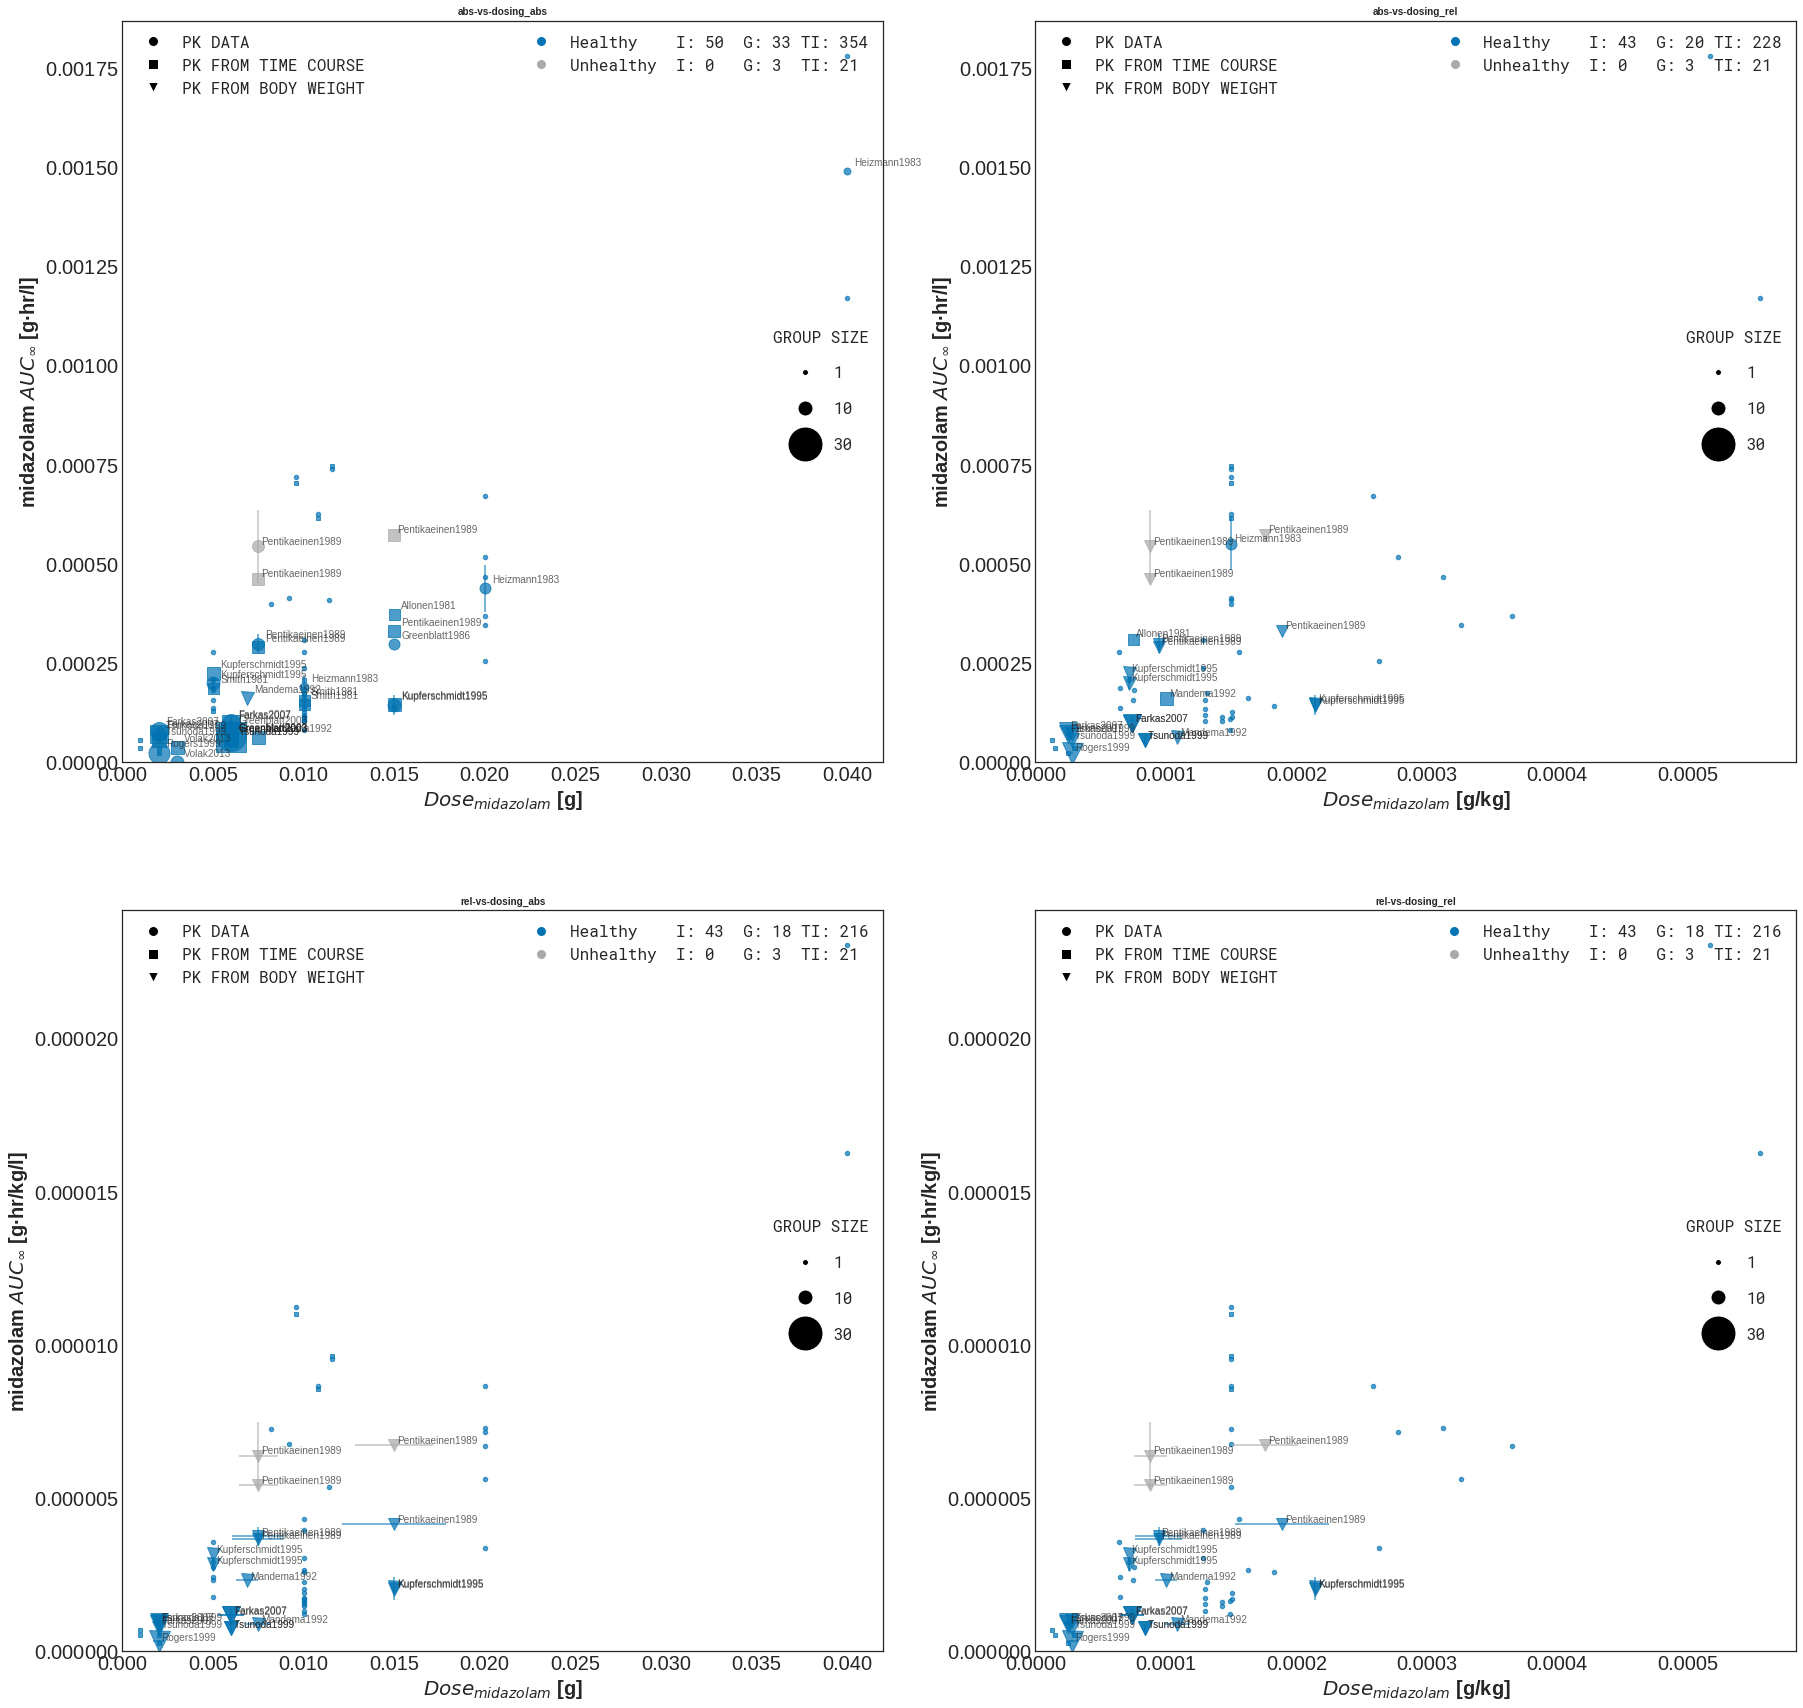

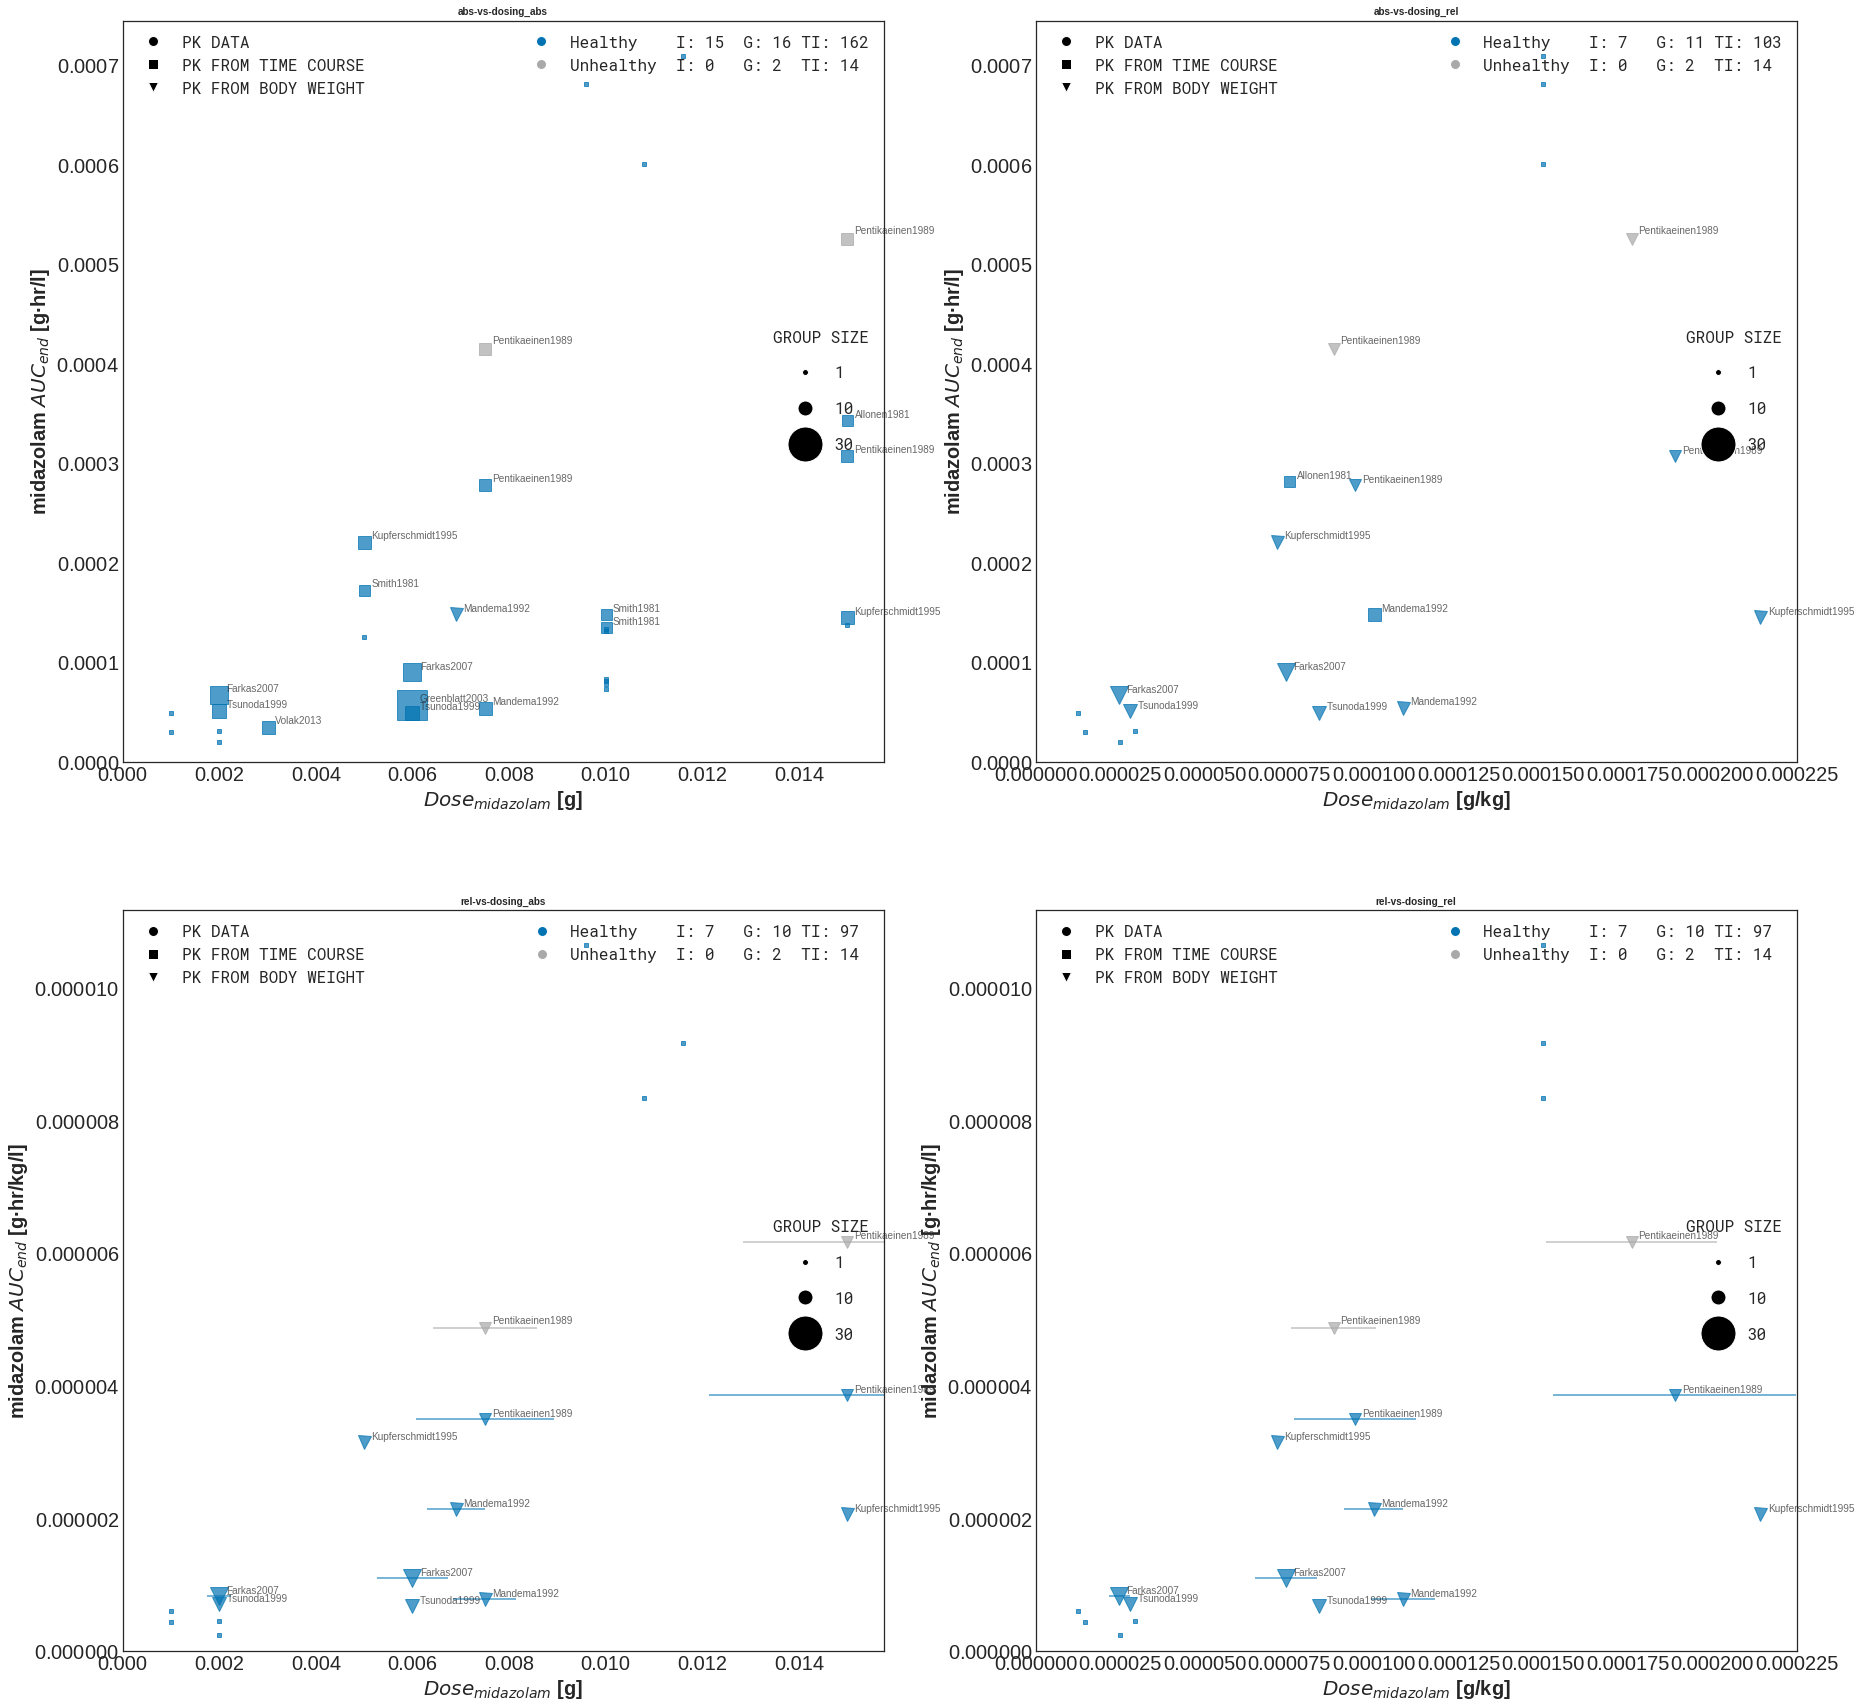

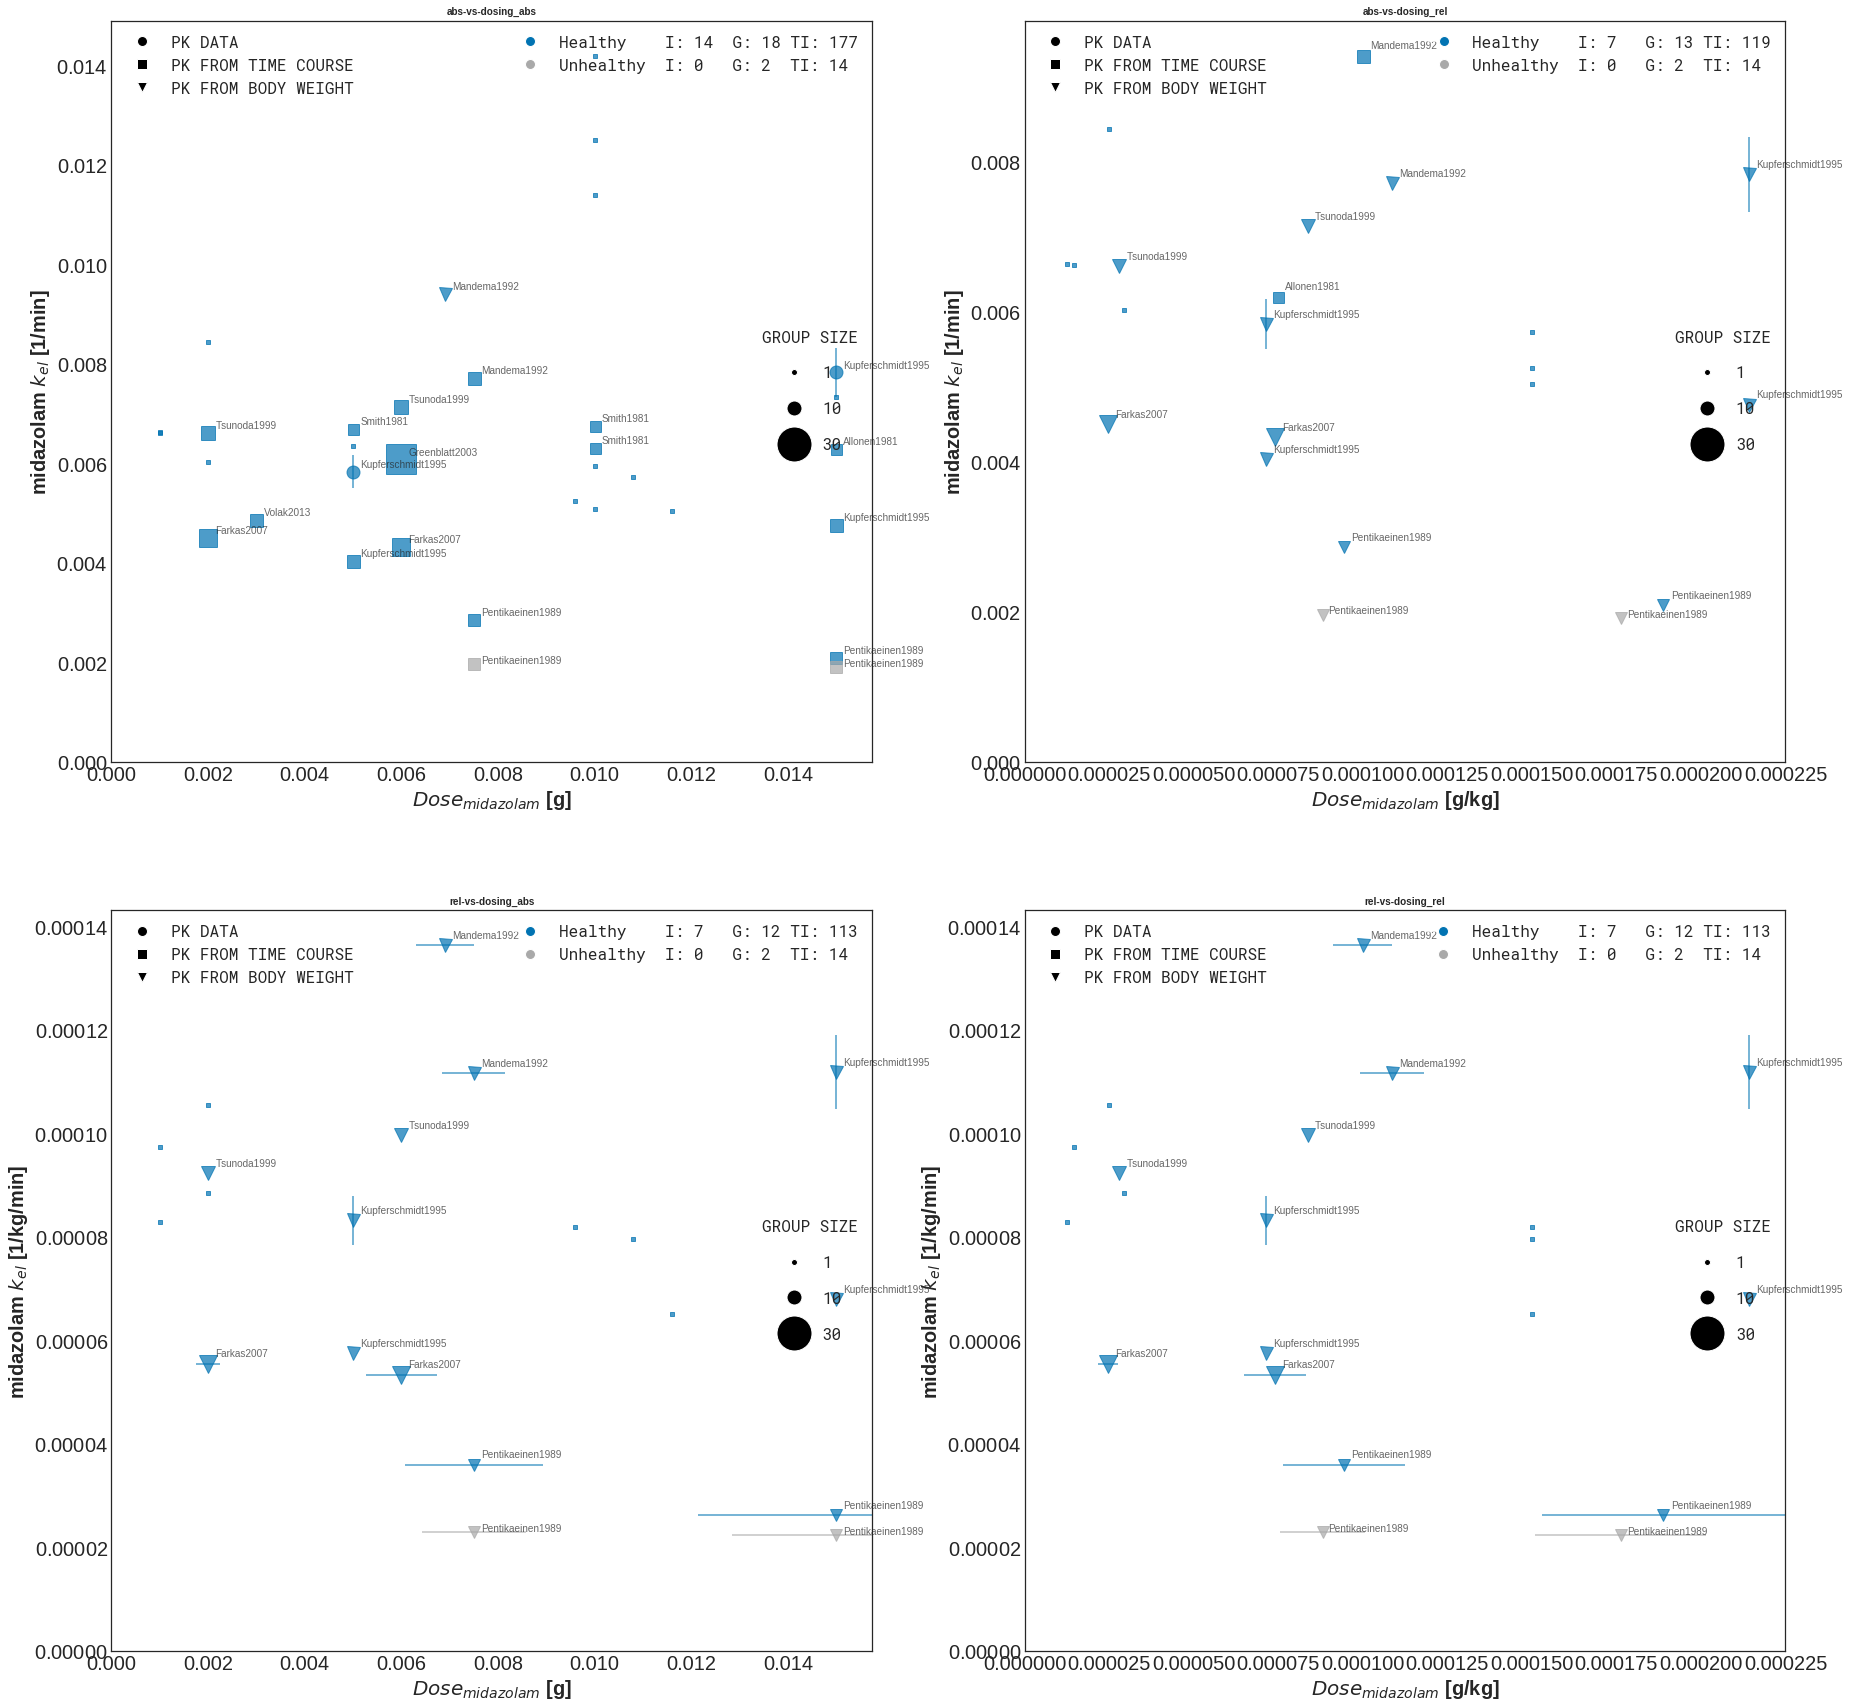

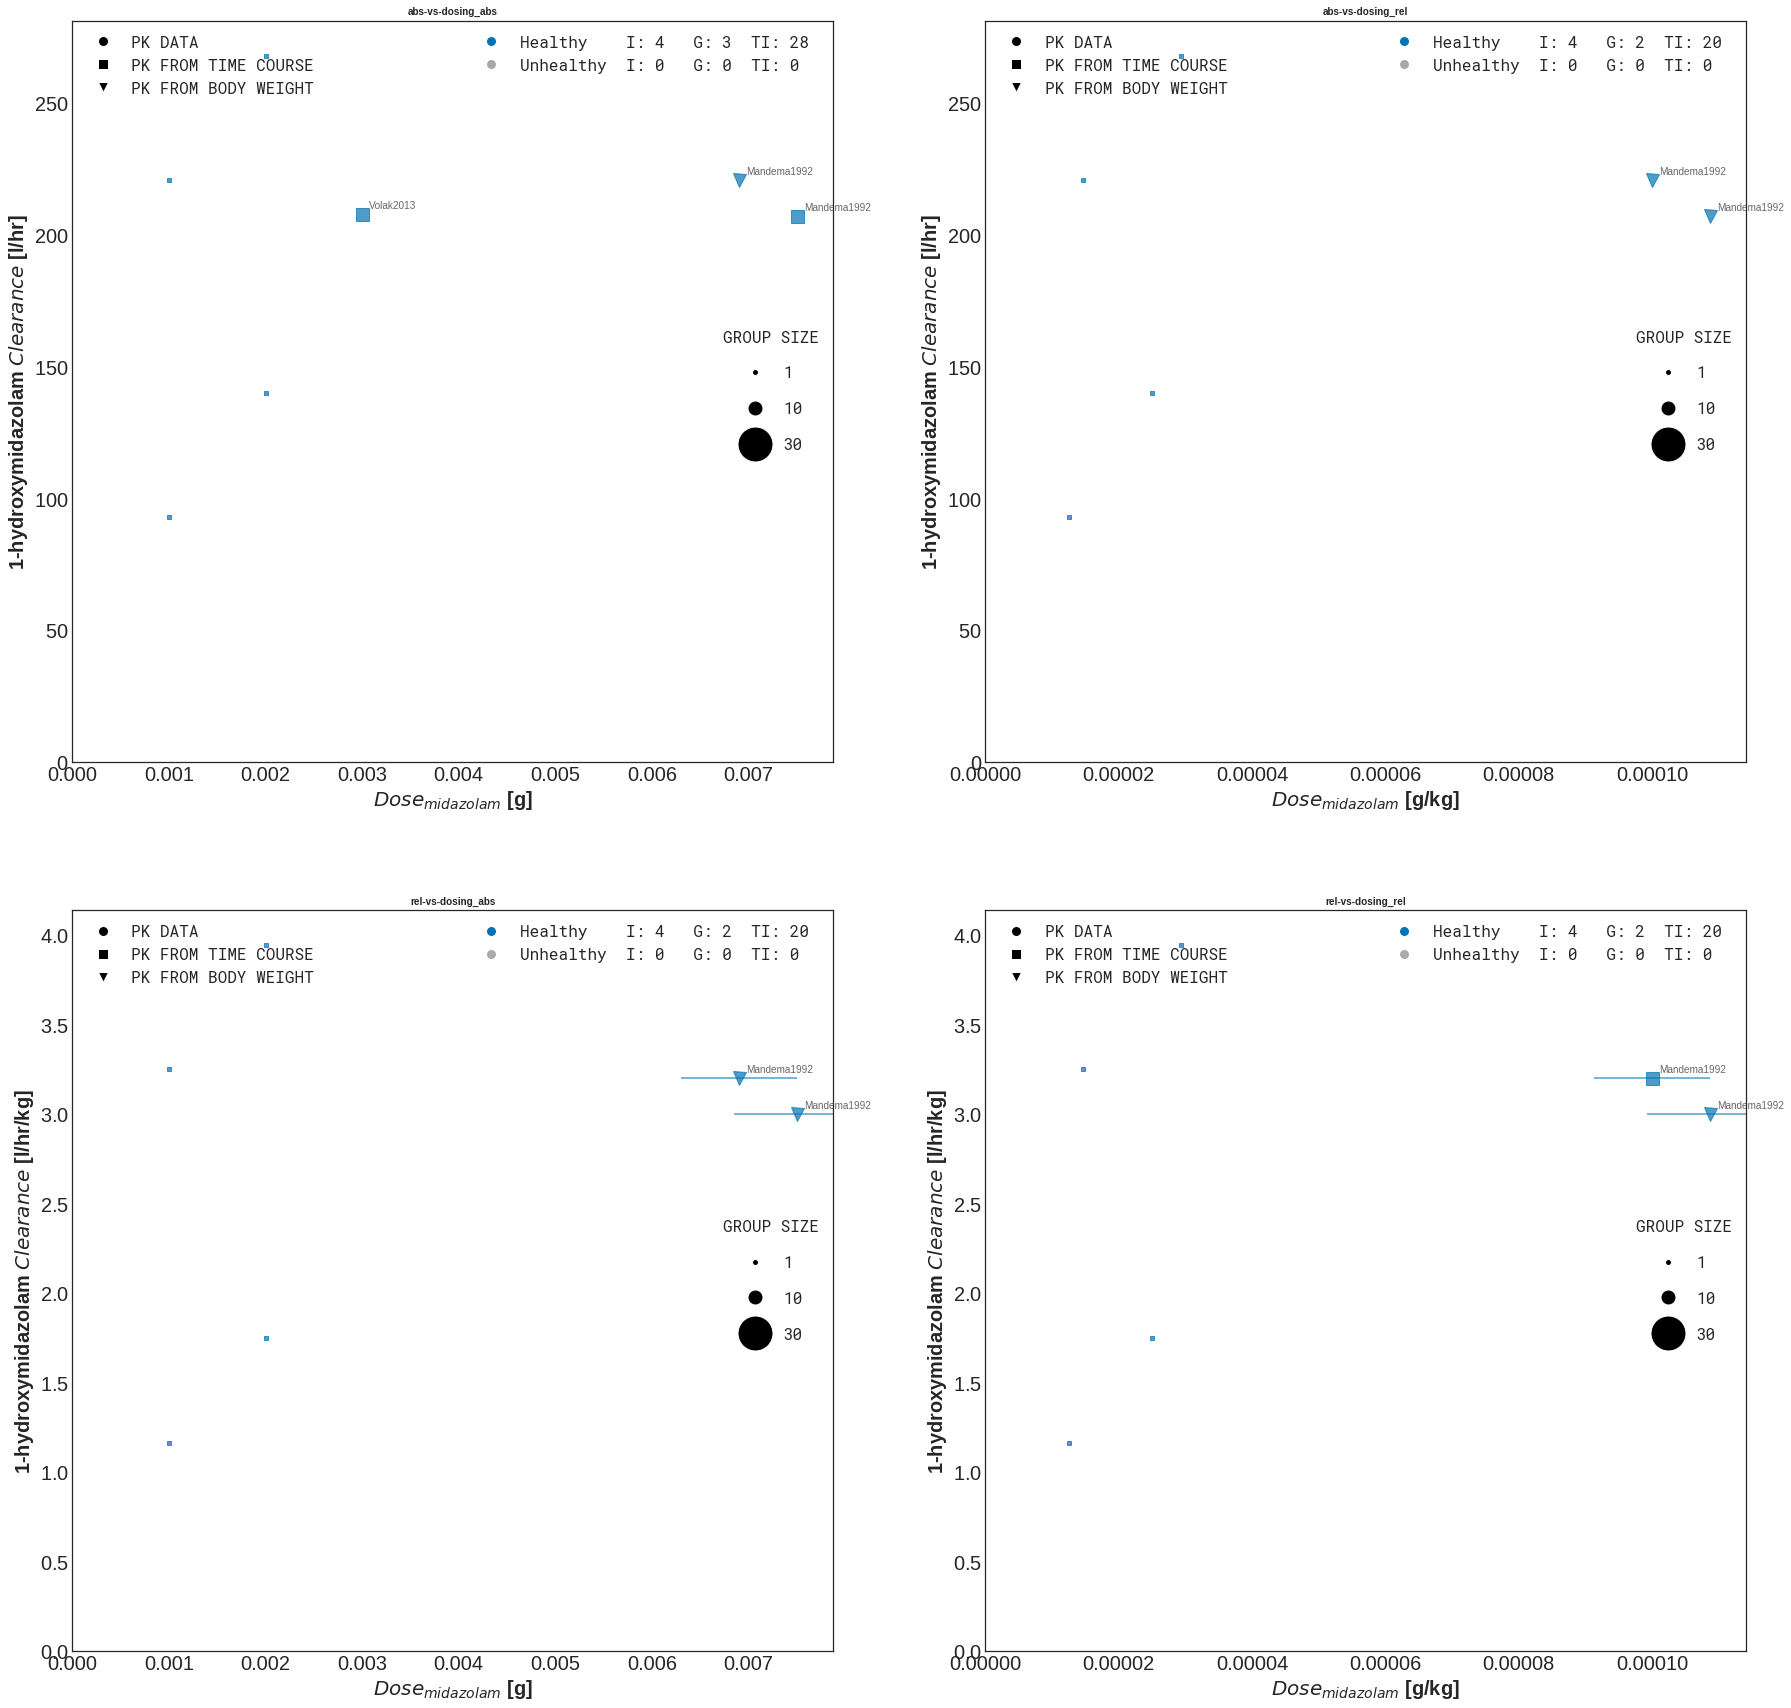

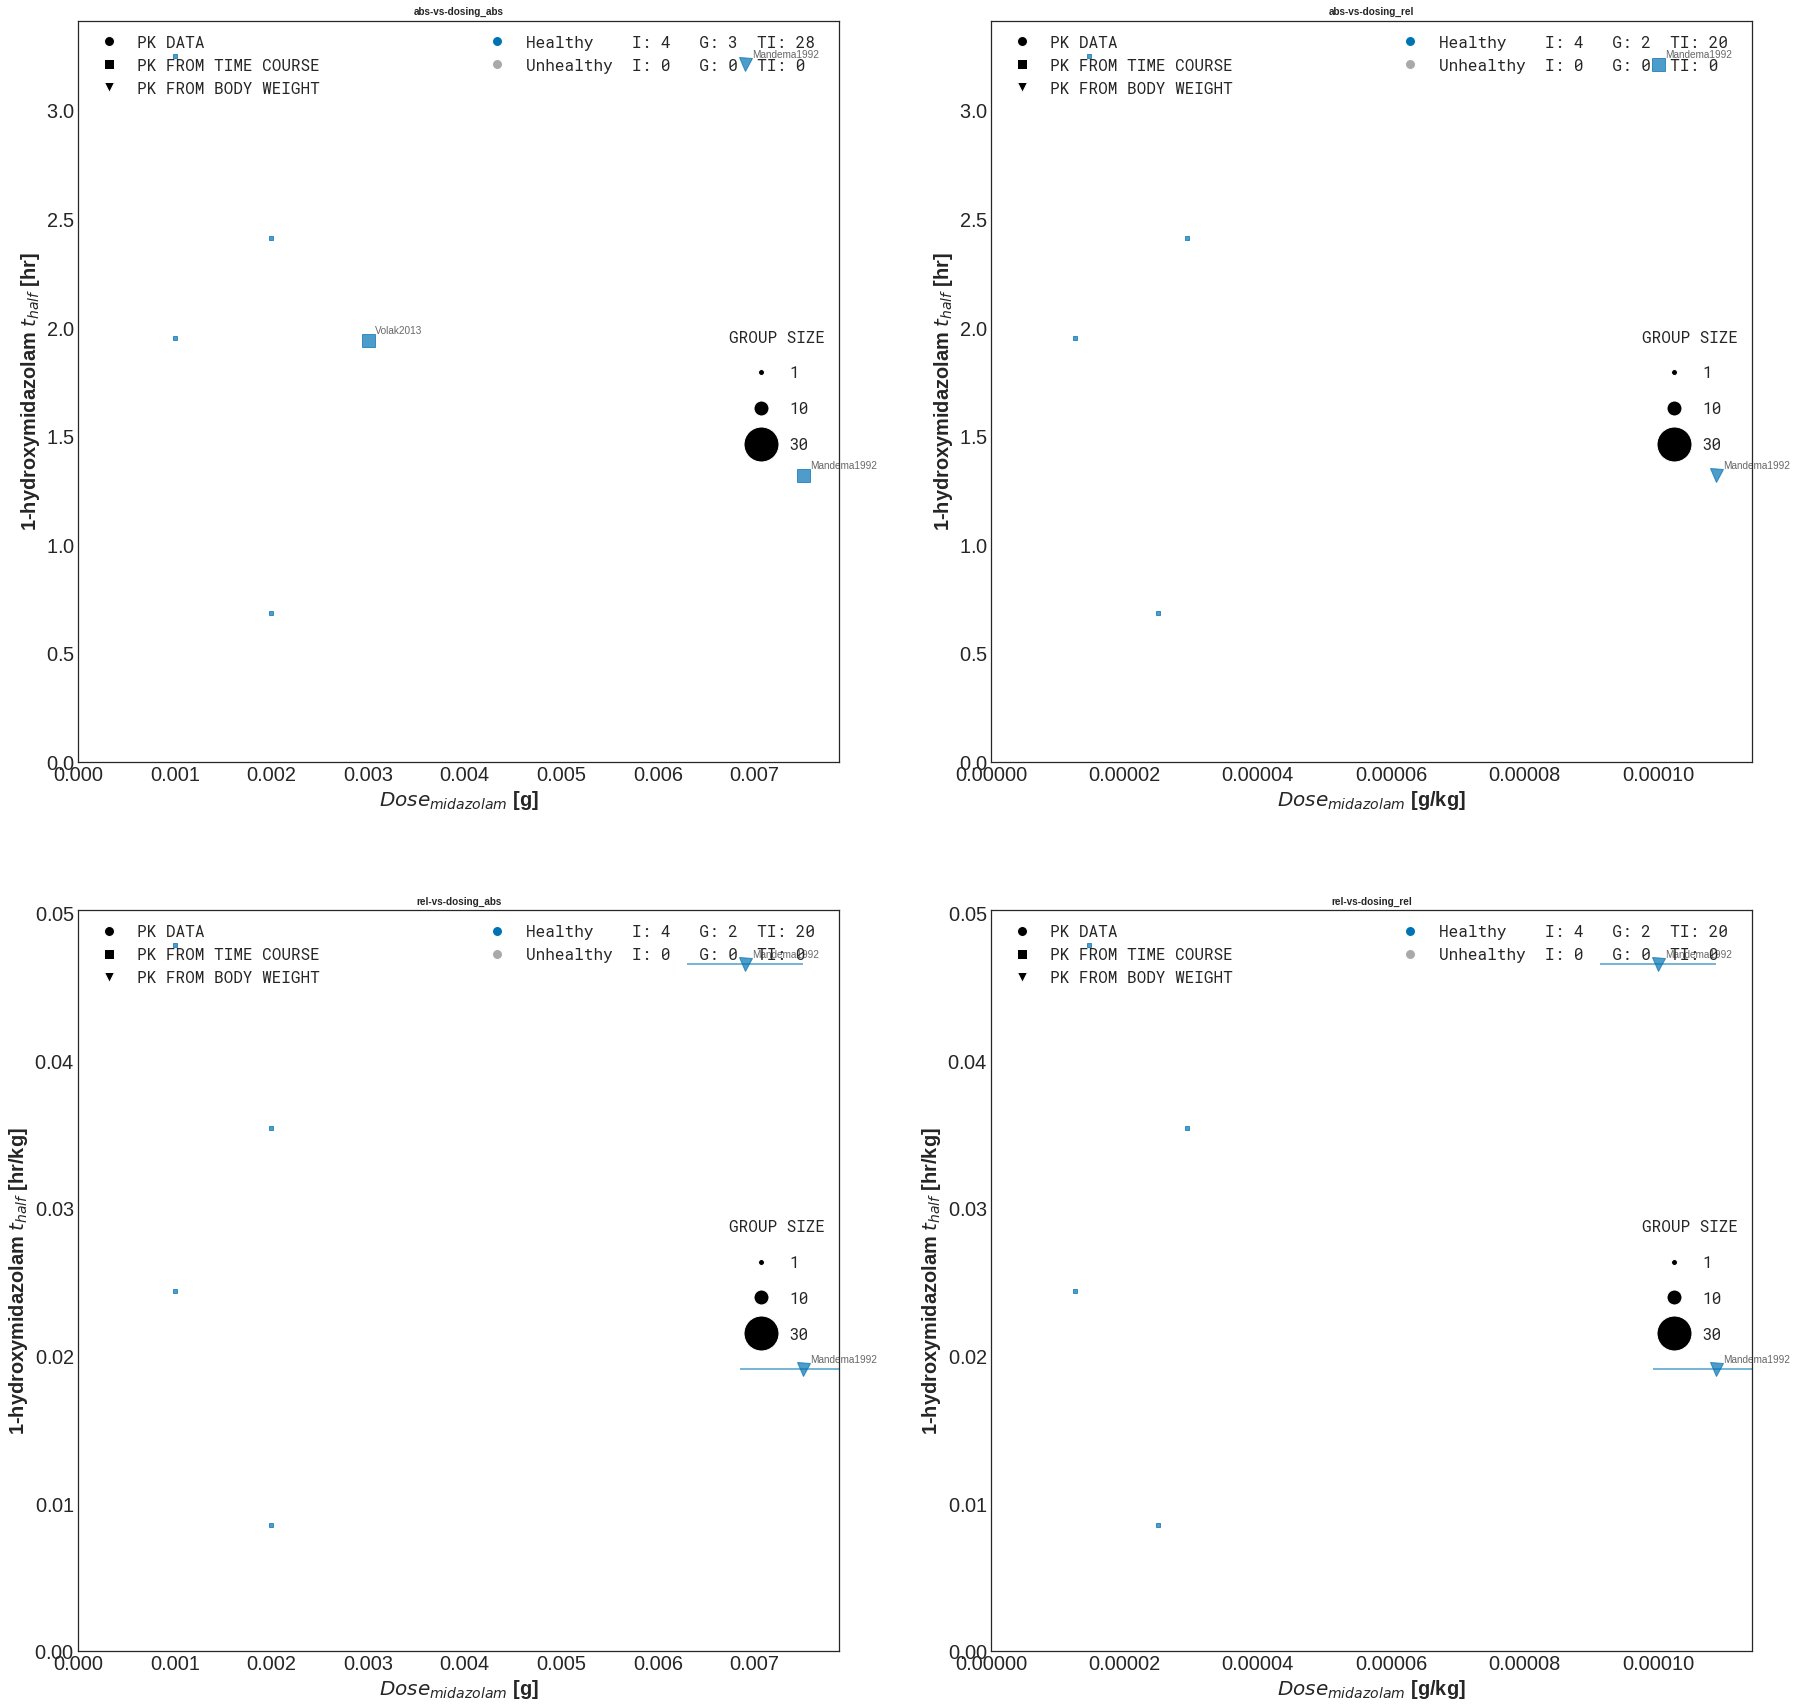

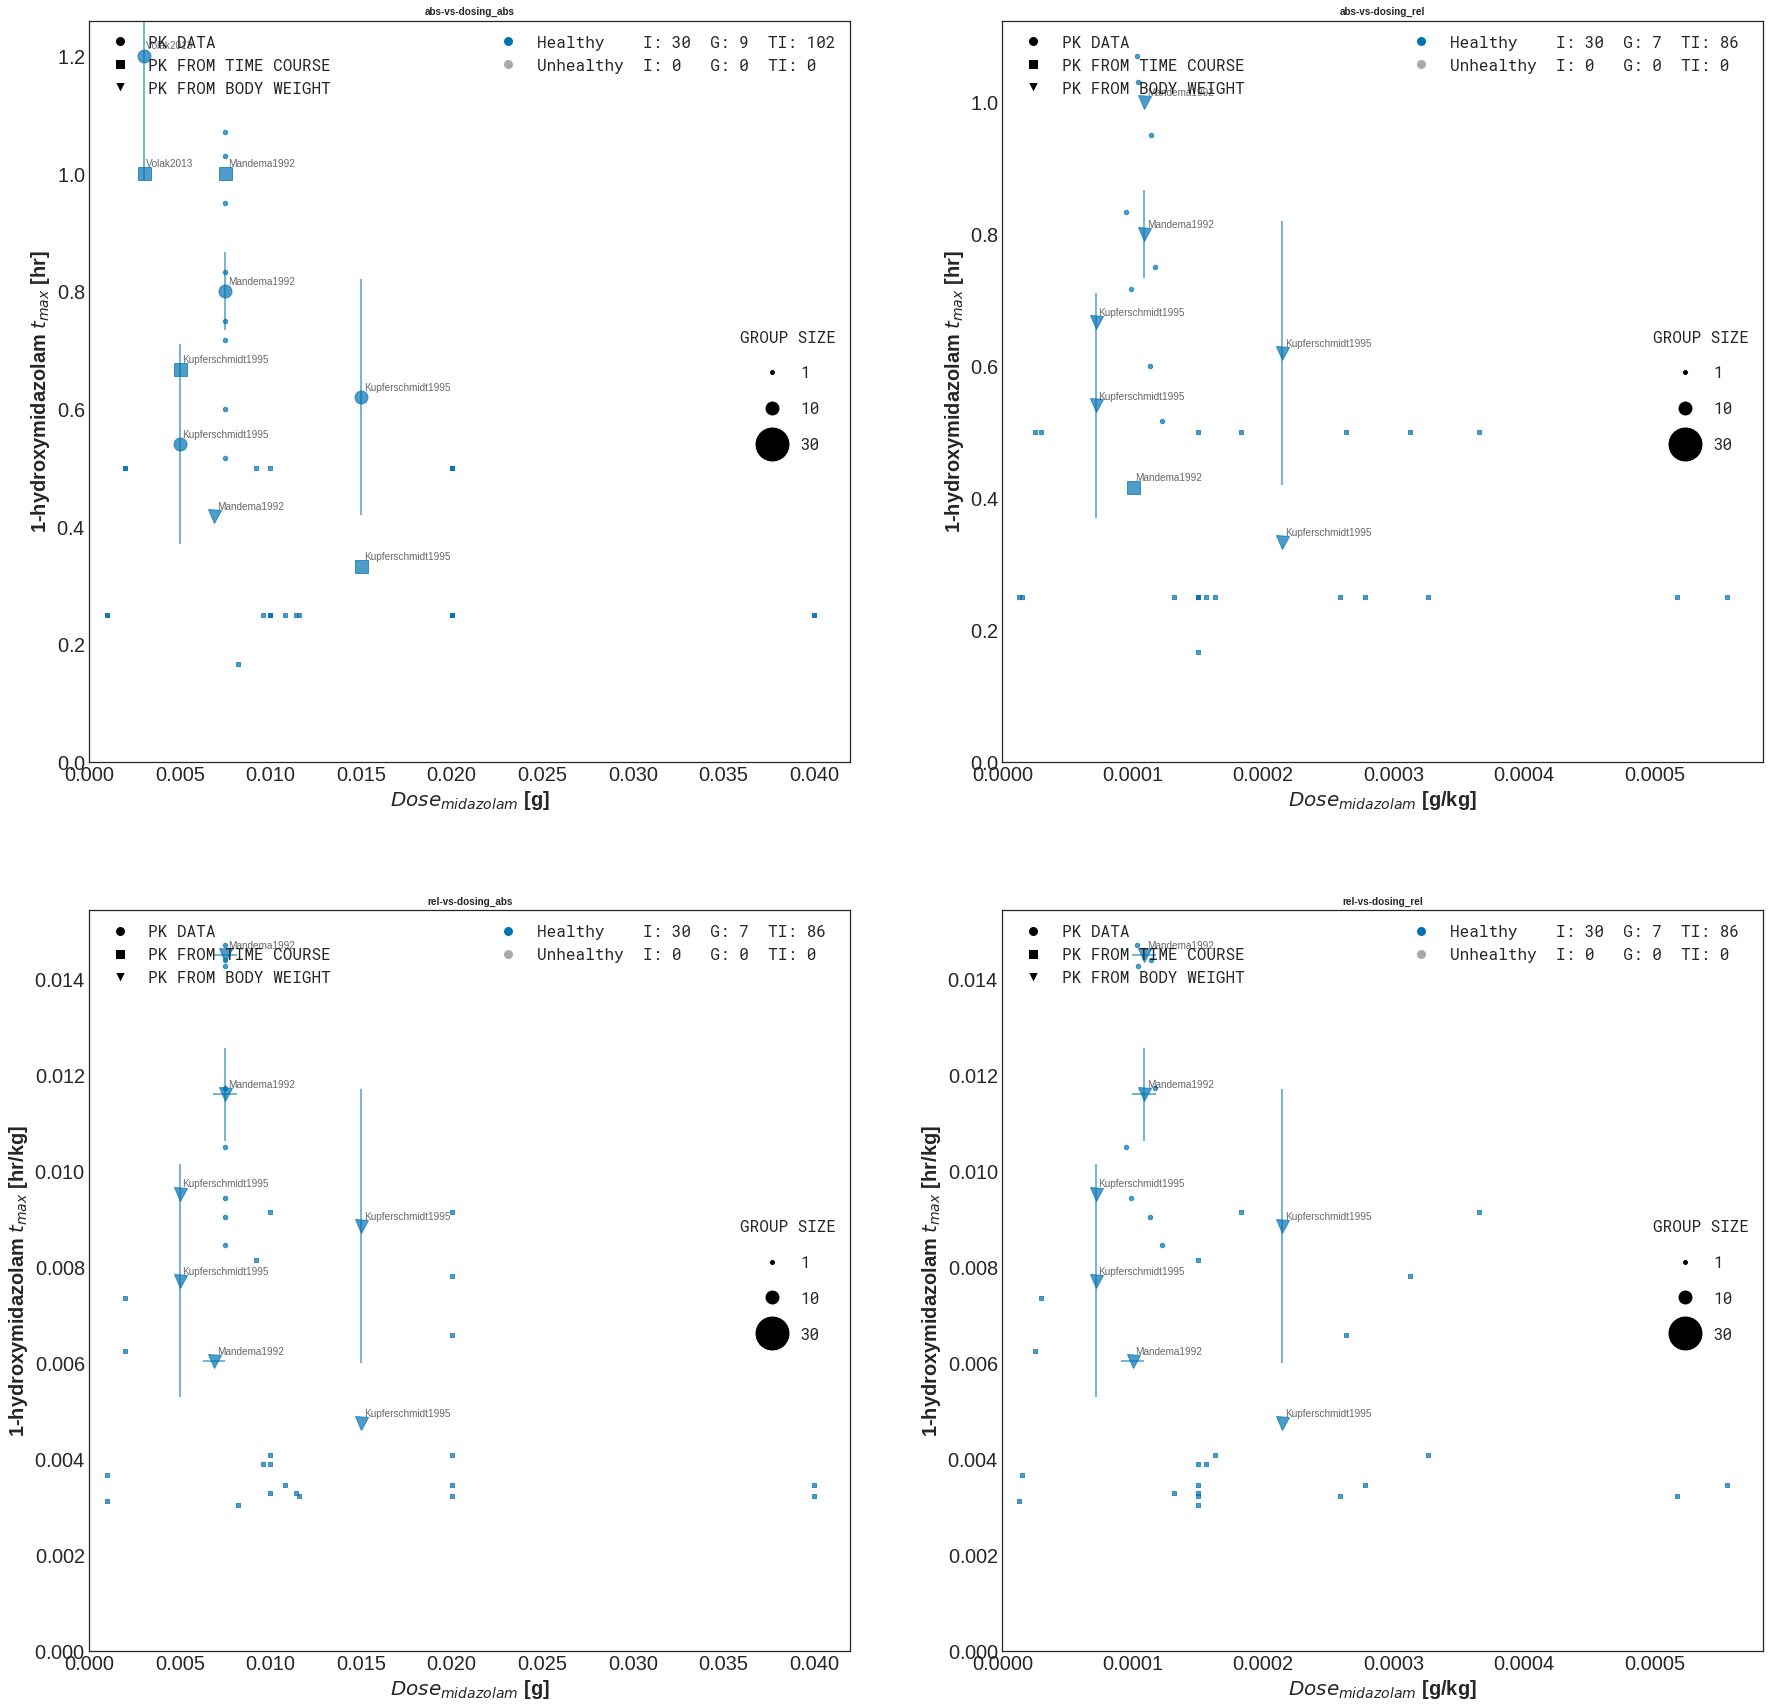

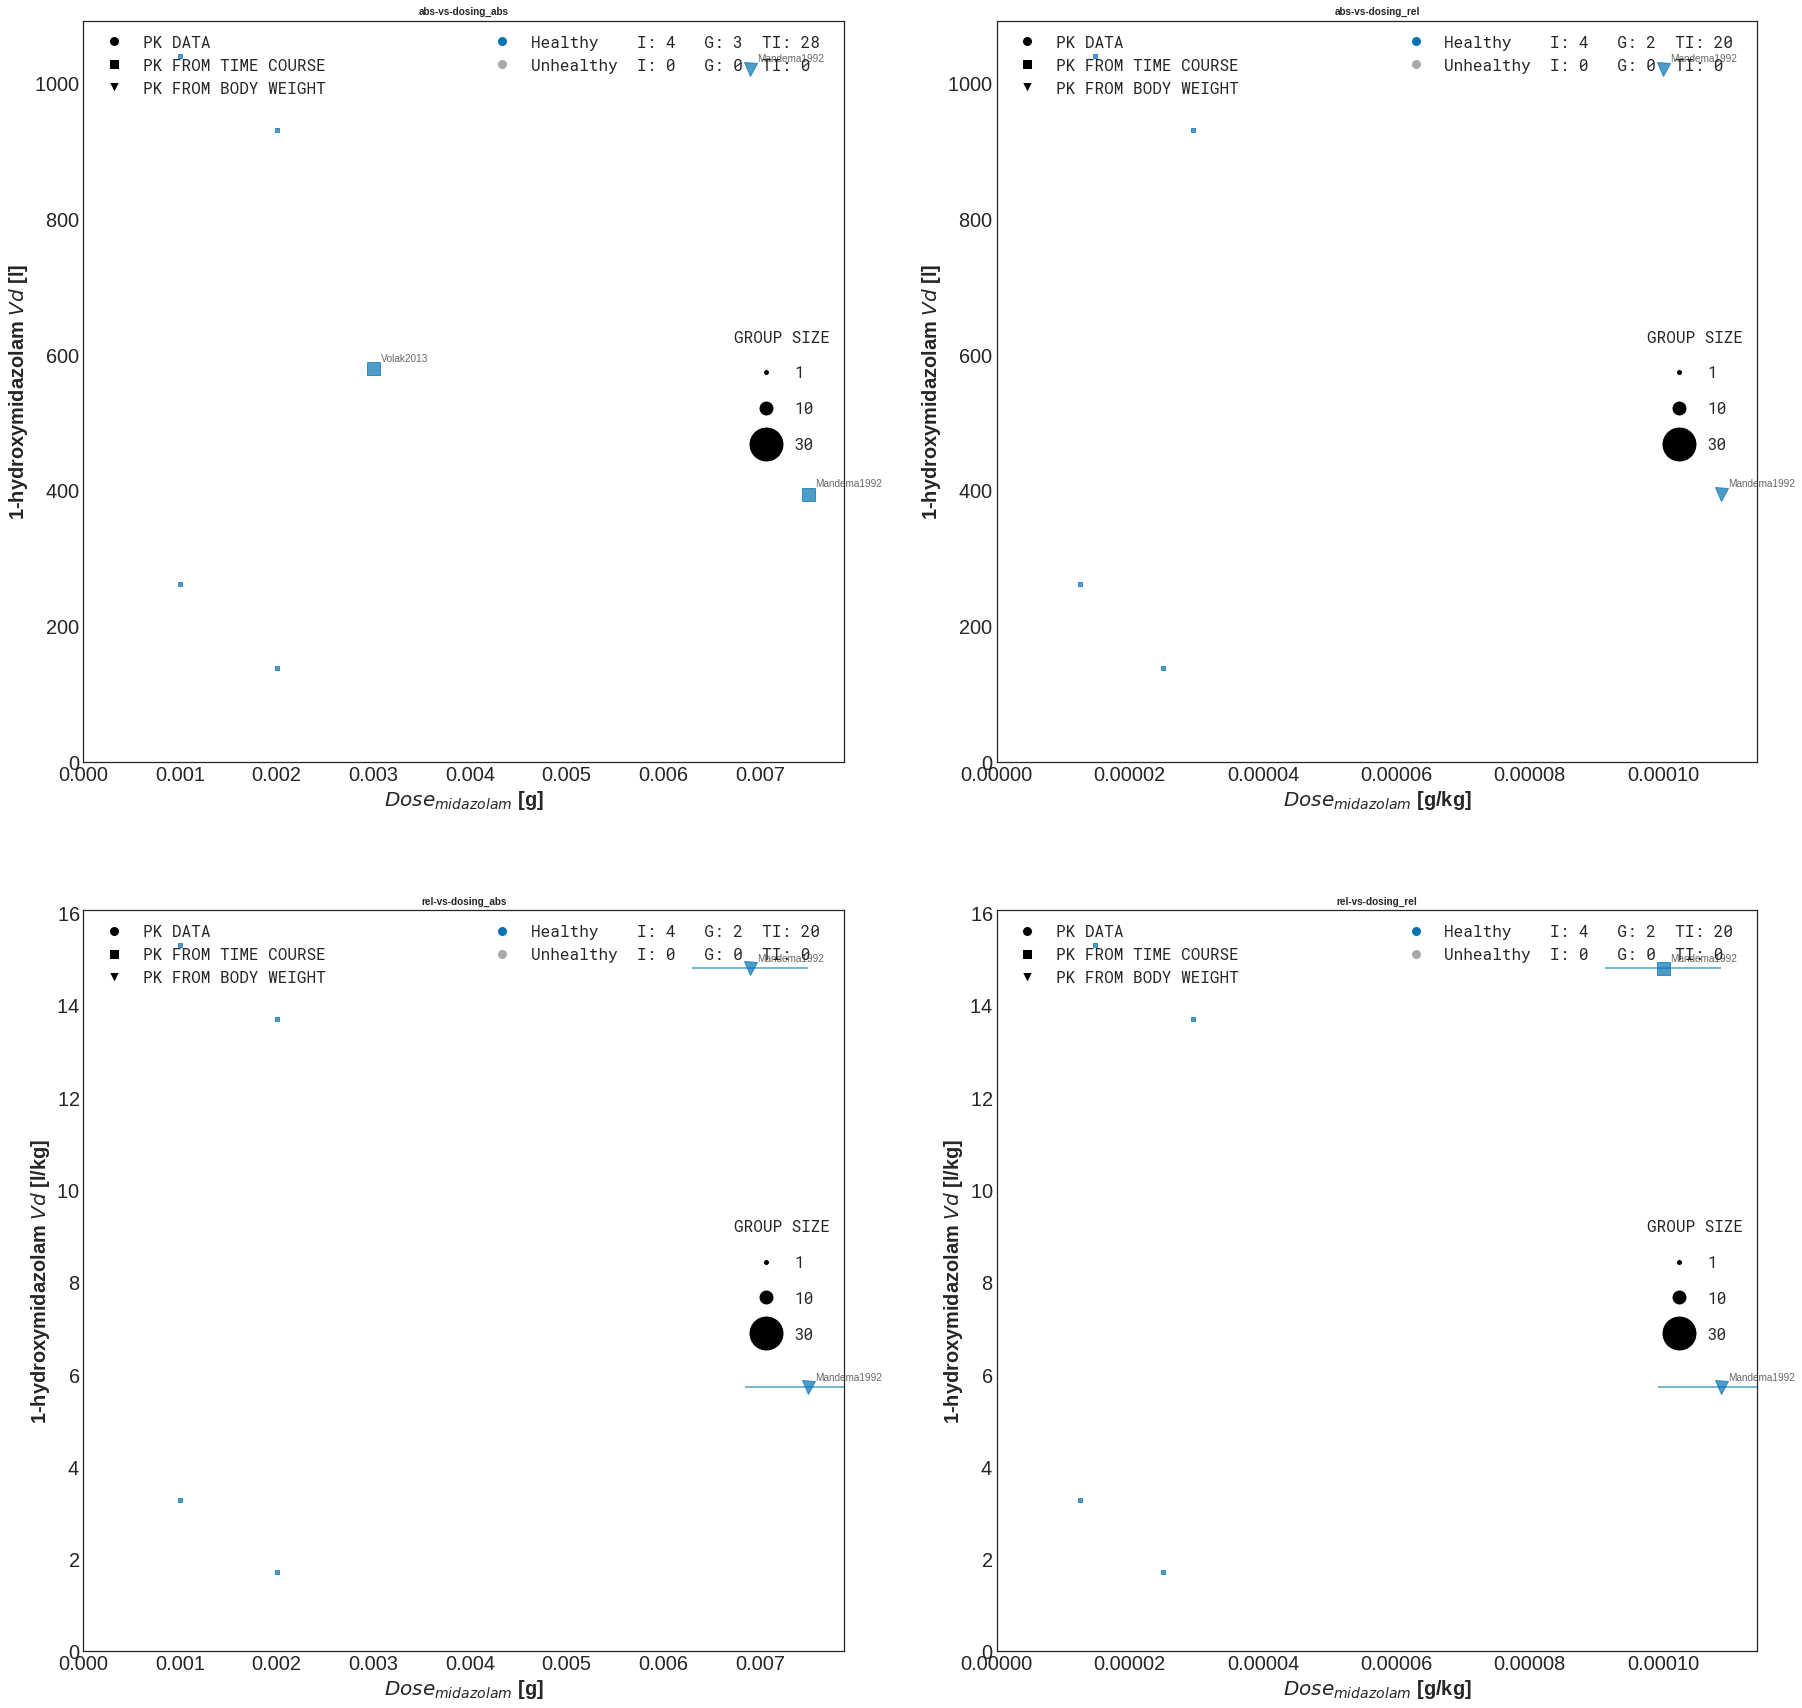

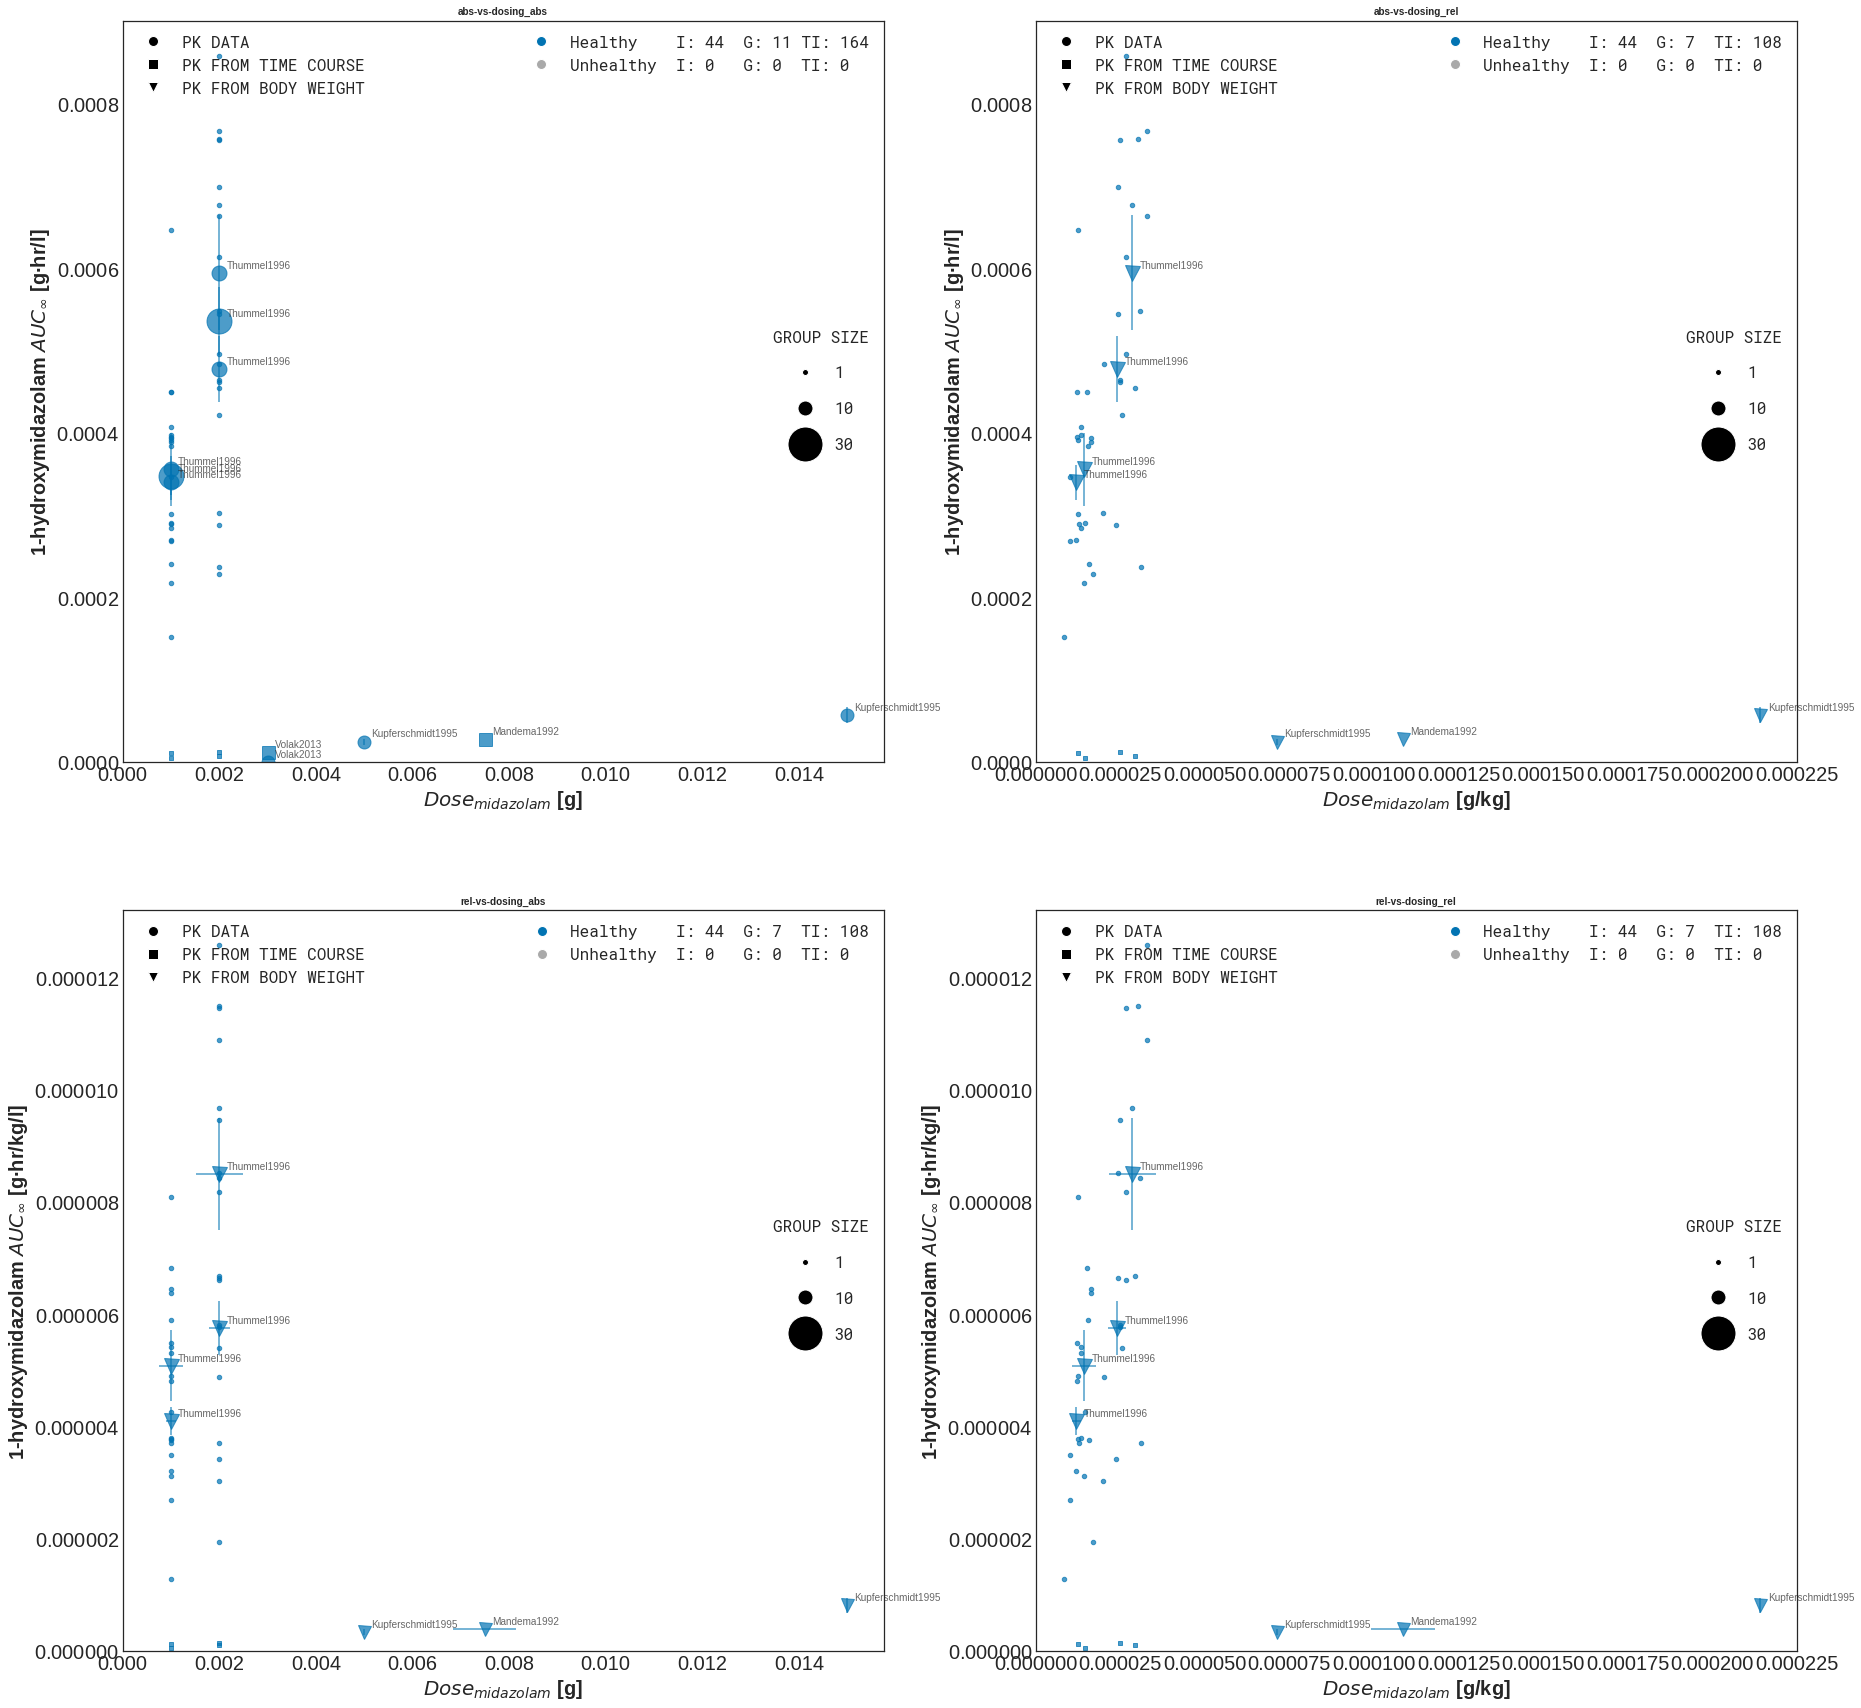

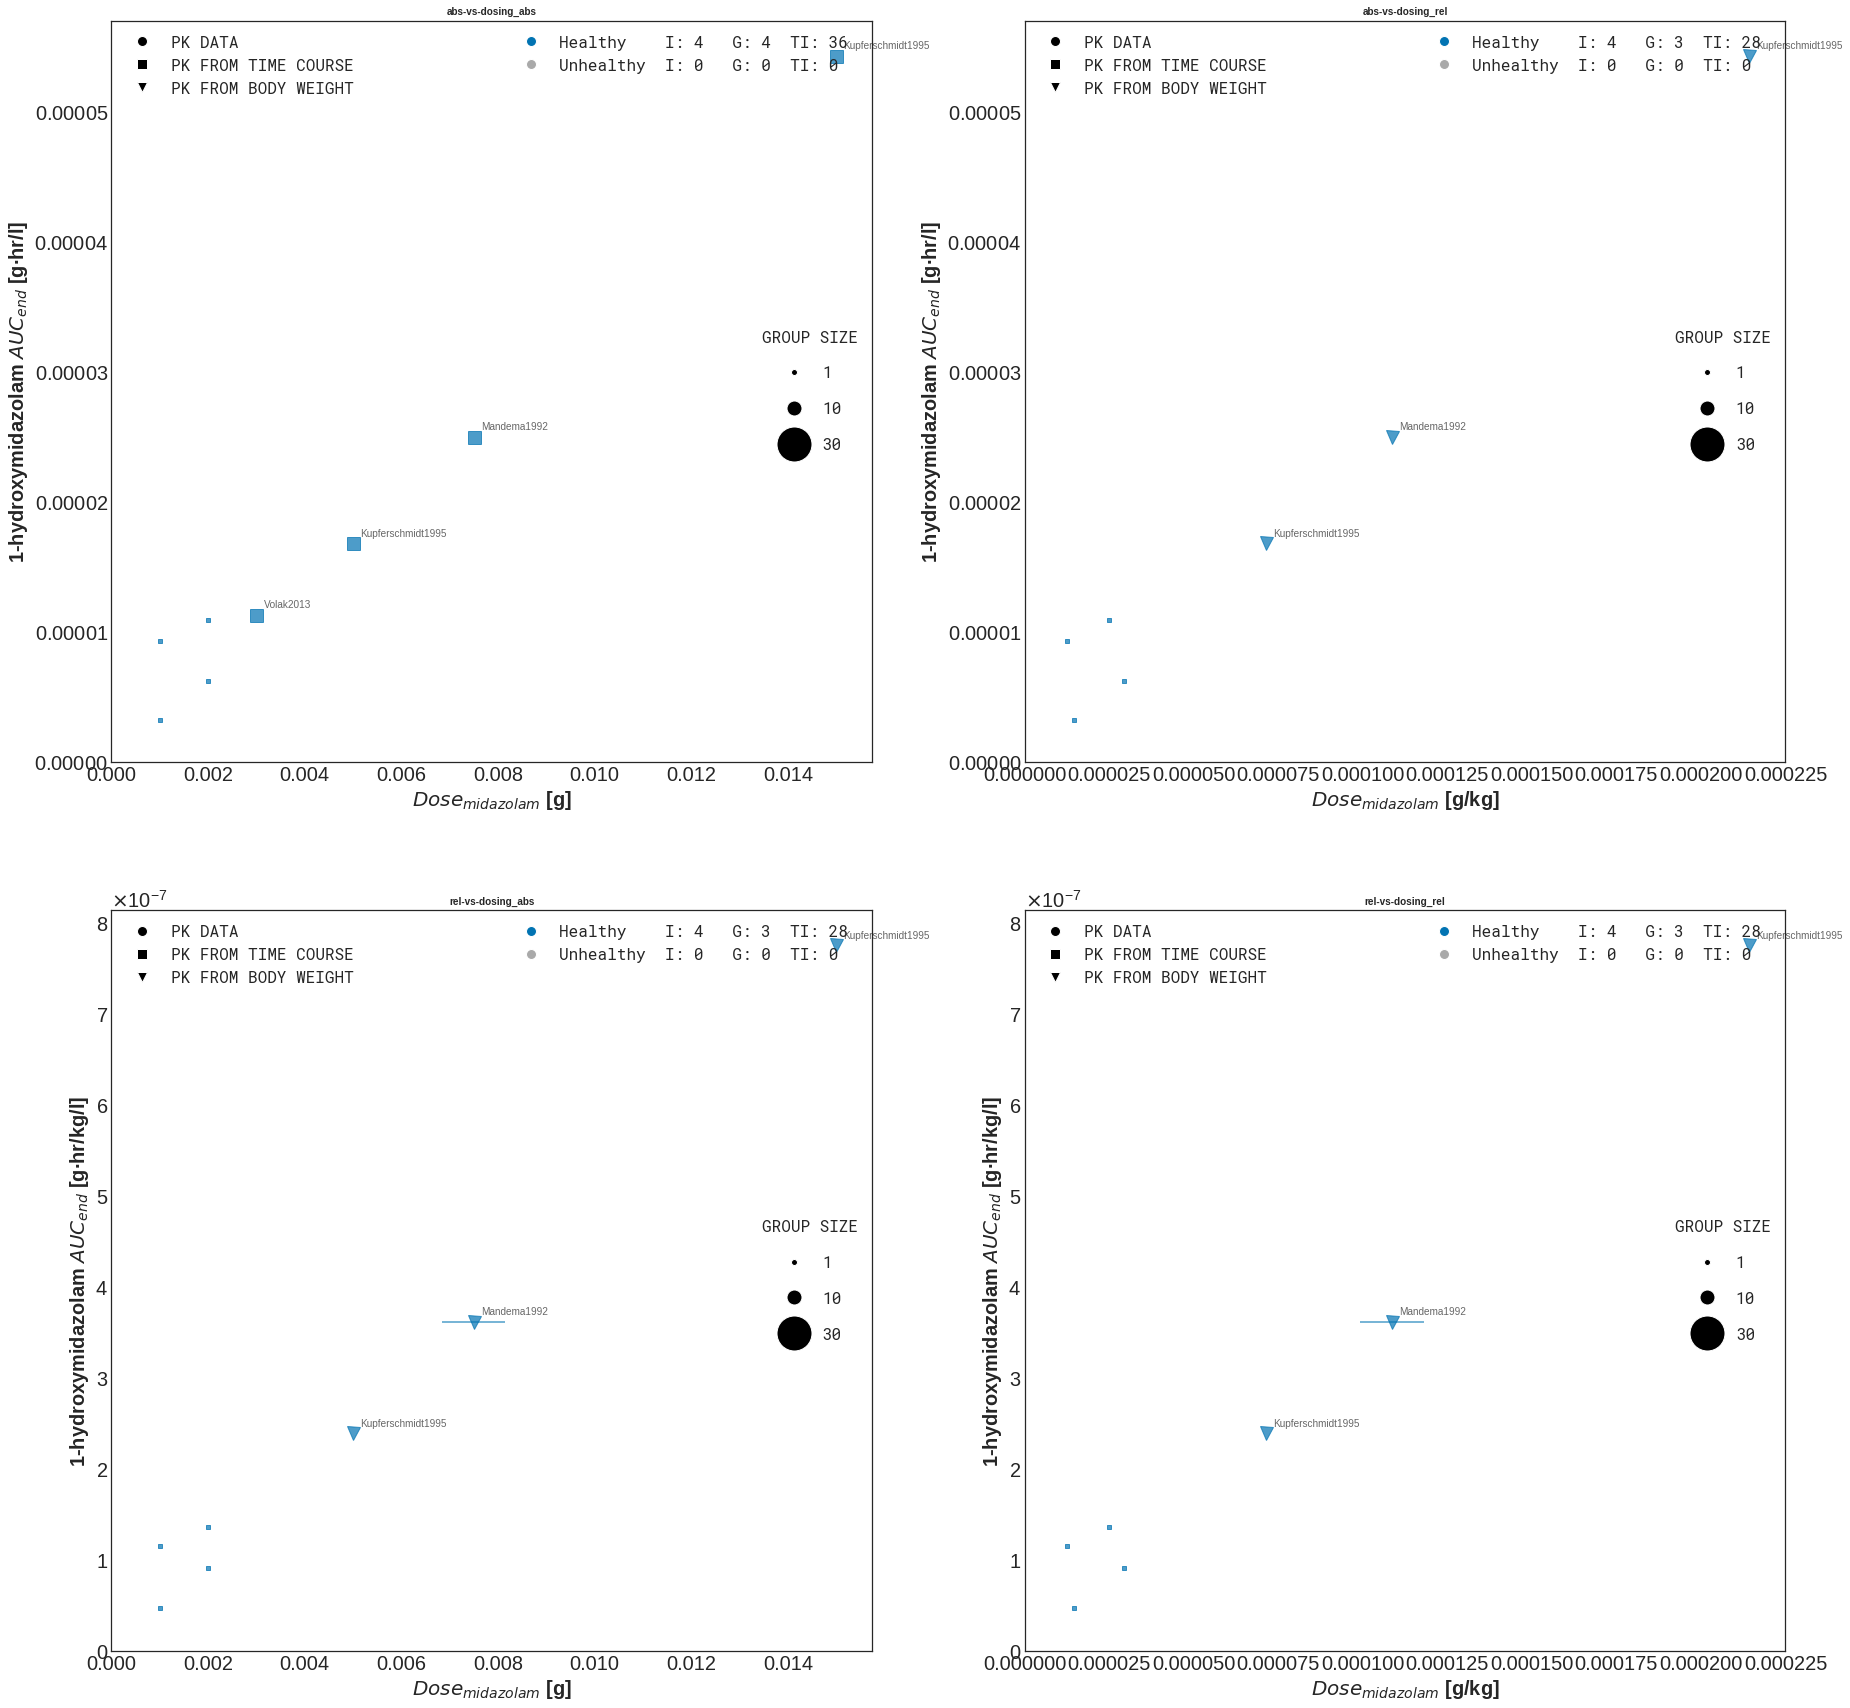

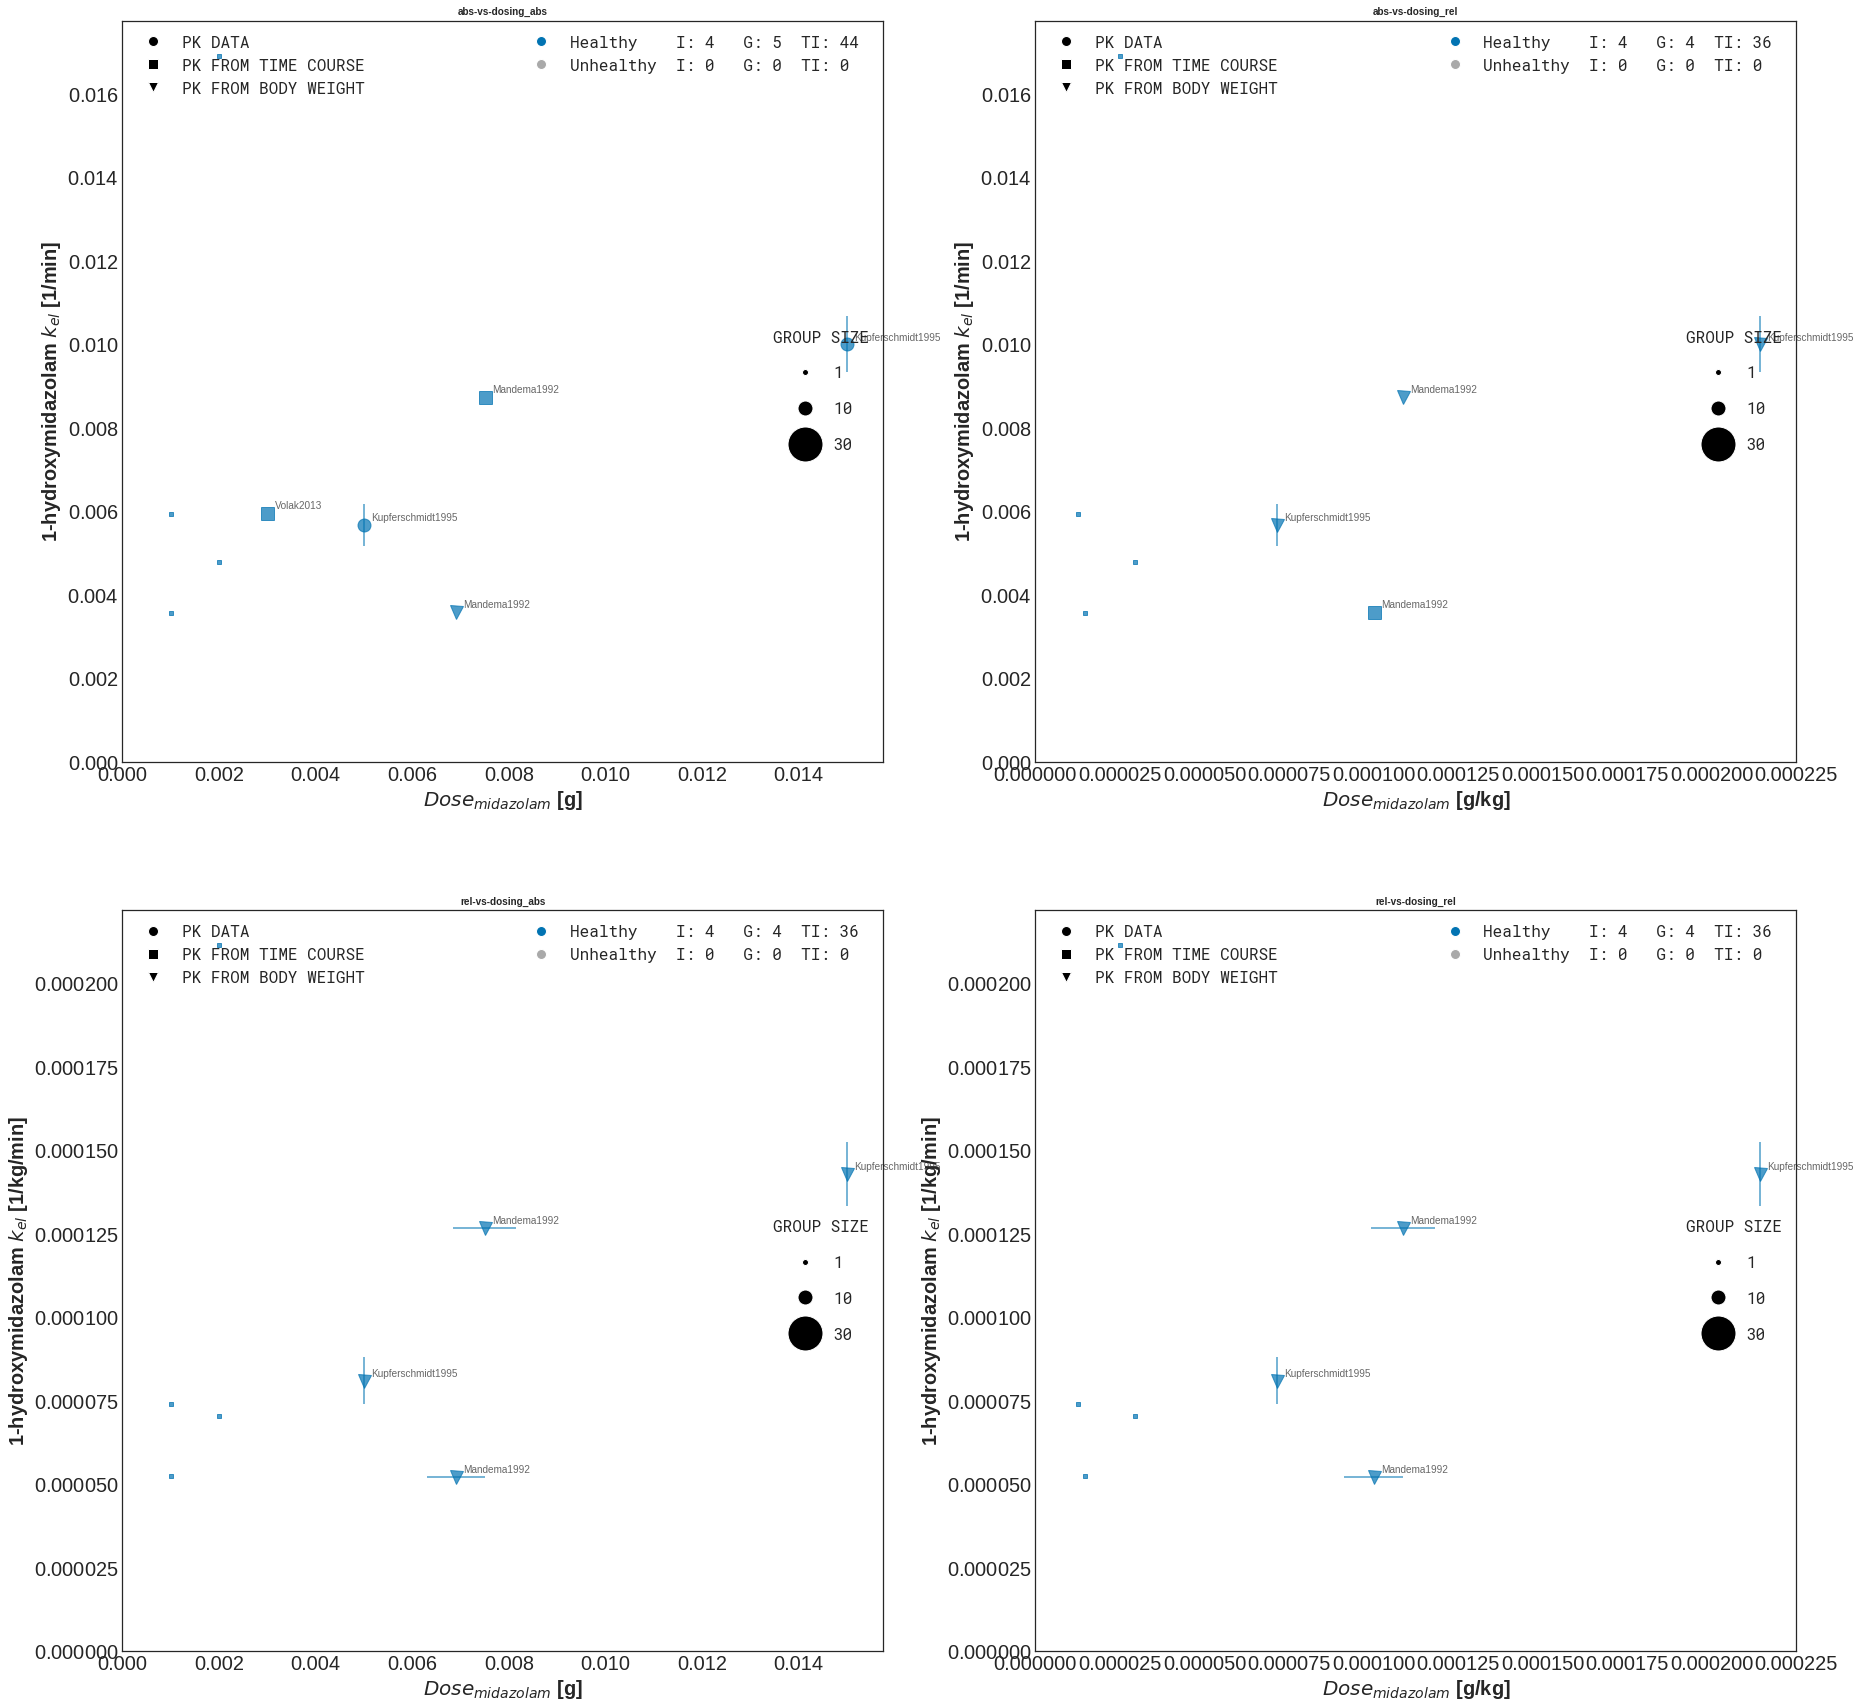

In [12]:
substances = [
    "midazolam", 
    "1-hydroxymidazolam"
]


def analyses(substance):
    return [f"{substance}_clearance",
            f"{substance}_thalf",
            f"{substance}_tmax",
            f"{substance}_vd",
            f"{substance}_auc_inf",
            f"{substance}_auc_end",
            f"{substance}_kel"]


for substance in substances:
    for analysis in analyses(substance):
        print(f"* {analysis} *")
        data_class = PkdbModel(analysis,destination="3-inferred")
        data_class.read()
        create_plots(data_class.data,categories_all,"reports/all")